## Import libraries


In [654]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Perfrom global settings

In [655]:
pd.options.display.float_format = '{:.2f}'.format 
pd.options.display.max_colwidth = 500

## Data Understanding, Preparation

In [656]:
df = pd.read_csv("/content/drive/MyDrive/trainhouses.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Get Shape of the dataset

In [657]:
print(df.shape)

(1460, 81)


### Get columns of the dataset

In [658]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Get dataset info

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Describe -Numerical columns 

Apply transpose for better understanding

In [660]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.00,730.50,421.61,1.00,365.75,730.50,1095.25,1460.00
MSSubClass,1460.00,56.90,42.30,20.00,20.00,50.00,70.00,190.00
LotFrontage,1201.00,70.05,24.28,21.00,59.00,69.00,80.00,313.00
LotArea,1460.00,10516.83,9981.26,1300.00,7553.50,9478.50,11601.50,215245.00
OverallQual,1460.00,6.10,1.38,1.00,5.00,6.00,7.00,10.00
OverallCond,1460.00,5.58,1.11,1.00,5.00,5.00,6.00,9.00
YearBuilt,1460.00,1971.27,30.20,1872.00,1954.00,1973.00,2000.00,2010.00
YearRemodAdd,1460.00,1984.87,20.65,1950.00,1967.00,1994.00,2004.00,2010.00
MasVnrArea,1452.00,103.69,181.07,0.00,0.00,0.00,166.00,1600.00
BsmtFinSF1,1460.00,443.64,456.10,0.00,0.00,383.50,712.25,5644.00


## Replace all NA by None for categorical columns

In [661]:
#df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")

### Find duplicates

In [662]:
df.duplicated().sum()

0

No duplicate data found

### Finding nulls

In [663]:
pd.options.display.max_rows=None
df.isnull().mean().sort_values(ascending=False).head(15)

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
LotFrontage    0.18
GarageYrBlt    0.06
GarageCond     0.06
GarageType     0.06
GarageFinish   0.06
GarageQual     0.06
BsmtFinType2   0.03
BsmtExposure   0.03
BsmtQual       0.03
BsmtCond       0.03
dtype: float64

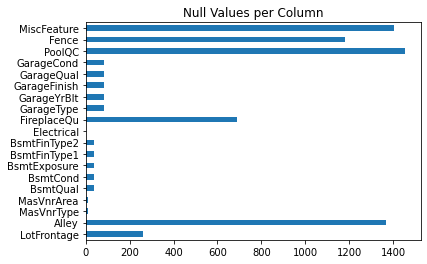

In [664]:
columns_with_nulls = df.columns[df.isnull().any()].tolist()
df[columns_with_nulls].isnull().sum().plot(kind='barh', title='Null Values per Column')
plt.show()

We can see that the following columns have excess null data - lets drop them (PoolQC,MiscFeature,Alley,Fence)

In [665]:

df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

### Handling missing values for LotFrontage

In [666]:
df['LotFrontage'].describe()

count   1201.00
mean      70.05
std       24.28
min       21.00
25%       59.00
50%       69.00
75%       80.00
max      313.00
Name: LotFrontage, dtype: float64

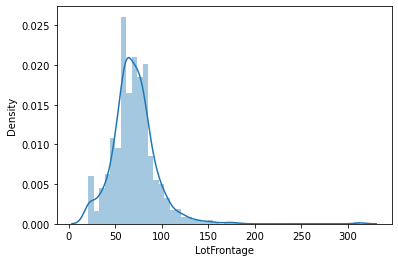

In [667]:
sns.distplot(df["LotFrontage"])
plt.show()

We can see that the distribution is quite normal but with a very long right tail...lets check for outliers to decide if we have to apply mean or median on missing values

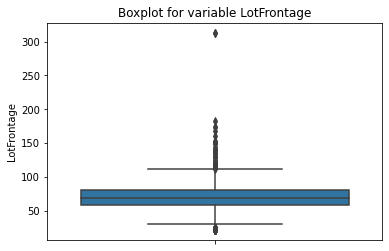

In [668]:
sns.boxplot(y=df["LotFrontage"])
plt.title(f'Boxplot for variable LotFrontage')
plt.show()

Clearly, mean would be a good fit for all missing data as they are few outliers

In [669]:
df.loc[df['LotFrontage'].isnull()==True,'LotFrontage']=df["LotFrontage"].mean()

### Handling missing values for FireplaceQu

In [670]:
df["FireplaceQu"].dtype

dtype('O')

In [671]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

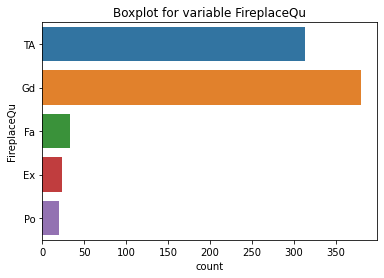

In [672]:
sns.countplot(y=df["FireplaceQu"])
plt.title(f'Boxplot for variable FireplaceQu')
plt.show()

We could replace nulls with NA indicating "No Fireplace"

In [673]:
df.loc[df['FireplaceQu'].isnull()==True,'FireplaceQu']="NA"

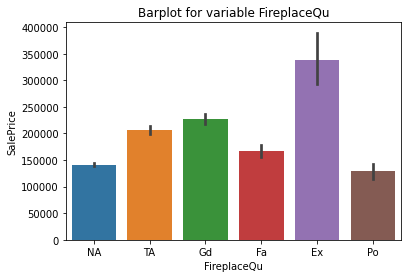

In [674]:
sns.barplot(x='FireplaceQu',y='SalePrice',data=df)
plt.title(f'Barplot for variable FireplaceQu')
plt.show()

### Handling missing values for BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure

Filling "NB" means No Basement for all 5

In [675]:
df.loc[df['BsmtFinType2'].isnull()==True,'BsmtFinType2']="NB"
df.loc[df['BsmtFinType1'].isnull()==True,'BsmtFinType1']="NB"

df.loc[df['BsmtQual'].isnull()==True,'BsmtQual']="NB"
df.loc[df['BsmtCond'].isnull()==True,'BsmtCond']="NB"

df.loc[df['BsmtExposure'].isnull()==True,'BsmtExposure']="NB"

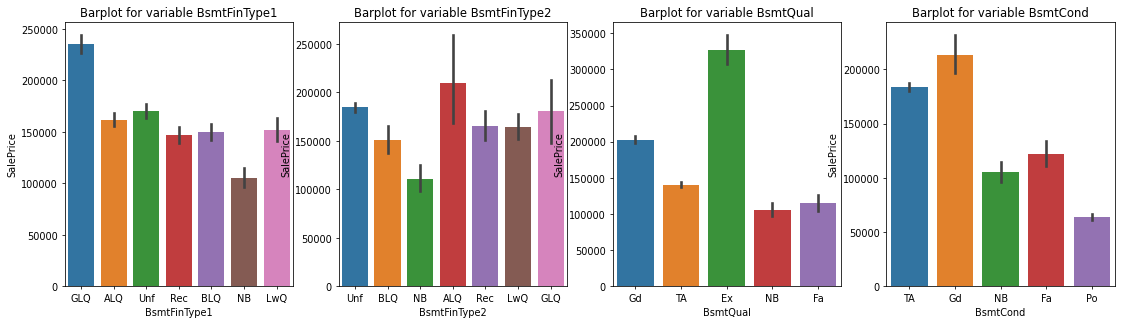

In [676]:
plt.figure(figsize=(20, 5), dpi=70)

plt.subplot(1, 4, 1)
sns.barplot(x='BsmtFinType1',y='SalePrice',data=df)
plt.title(f'Barplot for variable BsmtFinType1')

plt.subplot(1, 4, 2)
sns.barplot(x='BsmtFinType2',y='SalePrice',data=df)
plt.title(f'Barplot for variable BsmtFinType2')

plt.subplot(1, 4, 3)
sns.barplot(x='BsmtQual',y='SalePrice',data=df)
plt.title(f'Barplot for variable BsmtQual')

plt.subplot(1, 4, 4)
sns.barplot(x='BsmtCond',y='SalePrice',data=df)
plt.title(f'Barplot for variable BsmtCond')

plt.subplots_adjust(left=0.15)
plt.show()

### Handling varibales related to garage

Filling "NA" for nulls indicating "No Garage"

In [677]:
#No Garage
df.loc[df['GarageCond'].isnull()==True,'GarageCond']="NA"
df.loc[df['GarageType'].isnull()==True,'GarageType']="NA"

df.loc[df['GarageFinish'].isnull()==True,'GarageFinish']="NA"
df.loc[df['GarageQual'].isnull()==True,'GarageQual']="NA"

df.loc[df['GarageFinish'].isnull()==True,'GarageFinish']="NA"
df.loc[df['GarageYrBlt'].isnull()==True,'GarageYrBlt']="NA"

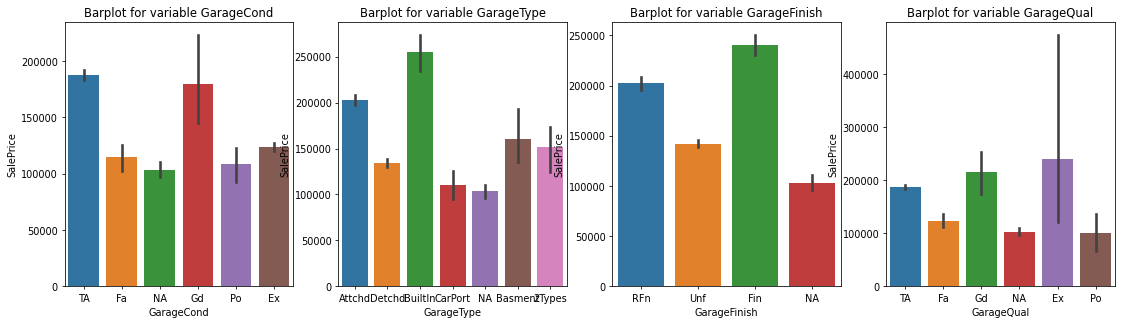

In [678]:
plt.figure(figsize=(20, 5), dpi=70)

plt.subplot(1, 4, 1)
sns.barplot(x='GarageCond',y='SalePrice',data=df)
plt.title(f'Barplot for variable GarageCond')

plt.subplot(1, 4, 2)
sns.barplot(x='GarageType',y='SalePrice',data=df)
plt.title(f'Barplot for variable GarageType')

plt.subplot(1, 4, 3)
sns.barplot(x='GarageFinish',y='SalePrice',data=df)
plt.title(f'Barplot for variable GarageFinish')

plt.subplot(1, 4, 4)
sns.barplot(x='GarageQual',y='SalePrice',data=df)
plt.title(f'Barplot for variable GarageQual')

plt.subplots_adjust(left=0.15)
plt.show()

### Handling MasVnrType

Fill the null values as None

In [679]:
df.loc[df['MasVnrType'].isnull()==True,'MasVnrType']="None"

### Handling MasVnrArea

In [680]:
df[df['MasVnrArea'].isnull()]["MasVnrType"]

234     None
529     None
650     None
936     None
973     None
977     None
1243    None
1278    None
Name: MasVnrType, dtype: object

Since the MasVnrType is "None" that means it is not there we can just replace with 0

In [681]:
df.loc[df['MasVnrArea'].isnull()==True,'MasVnrArea']=0.0

In [682]:
df.isnull().mean().sort_values(ascending=False).head(15)

Electrical     0.00
Id             0.00
HalfBath       0.00
FireplaceQu    0.00
Fireplaces     0.00
Functional     0.00
TotRmsAbvGrd   0.00
KitchenQual    0.00
KitchenAbvGr   0.00
BedroomAbvGr   0.00
FullBath       0.00
HeatingQC      0.00
BsmtHalfBath   0.00
BsmtFullBath   0.00
GrLivArea      0.00
dtype: float64

**No null values found now, indicating we are good to go**

### Understanding Corelations 

In [683]:
df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
MasVnrArea       0.47
Fireplaces       0.47
BsmtFinSF1       0.39
LotFrontage      0.33
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
Id              -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64

In [684]:
### Scatter plots to understand relations better

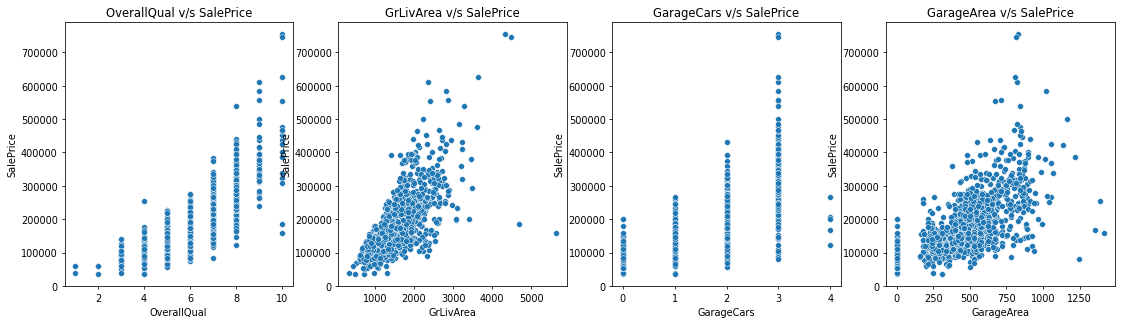

In [685]:
plt.figure(figsize=(20, 5), dpi=70)

plt.subplot(1, 4, 1)
sns.scatterplot(data=df,x="OverallQual", y="SalePrice")
plt.title(f'OverallQual v/s SalePrice')

plt.subplot(1, 4, 2)
sns.scatterplot(data=df,x="GrLivArea", y="SalePrice")
plt.title(f'GrLivArea v/s SalePrice')

plt.subplot(1, 4, 3)
sns.scatterplot(data=df,x="GarageCars", y="SalePrice")
plt.title(f'GarageCars v/s SalePrice')

plt.subplot(1, 4, 4)
sns.scatterplot(data=df,x="GarageArea", y="SalePrice")
plt.title(f'GarageArea v/s SalePrice')

plt.subplots_adjust(left=0.15)
plt.show()



1.   As the quality increases price increases.
2.   Living area between 10,000 to 25,000 is preferred more.
3.   More the cars parking space , more the price.
4.   More the garage area, more the price.
5.   Two cars parking area is highest preferred.
6.   250-700 area for car parking is preferred.



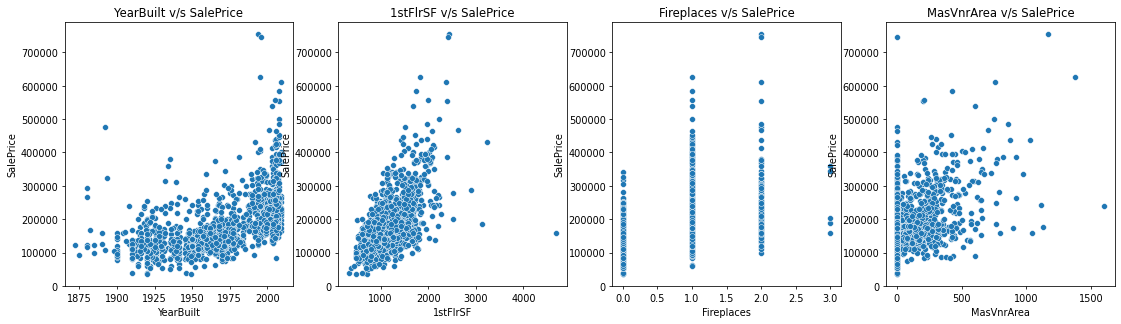

In [686]:
plt.figure(figsize=(20, 5), dpi=70)

plt.subplot(1, 4, 1)
sns.scatterplot(data=df,x="YearBuilt", y="SalePrice")
plt.title(f'YearBuilt v/s SalePrice')

plt.subplot(1, 4, 2)
sns.scatterplot(data=df,x="1stFlrSF", y="SalePrice")
plt.title(f'1stFlrSF v/s SalePrice')

plt.subplot(1, 4, 3)
sns.scatterplot(data=df,x="Fireplaces", y="SalePrice")
plt.title(f'Fireplaces v/s SalePrice')

plt.subplot(1, 4, 4)
sns.scatterplot(data=df,x="MasVnrArea", y="SalePrice")
plt.title(f'MasVnrArea v/s SalePrice')

plt.subplots_adjust(left=0.15)
plt.show()



1.   Yearbuilt really does not fluctuate the price a lot
2.   First floor Square feet is preferred between 1000-2000



In [687]:
df["SalePrice"].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

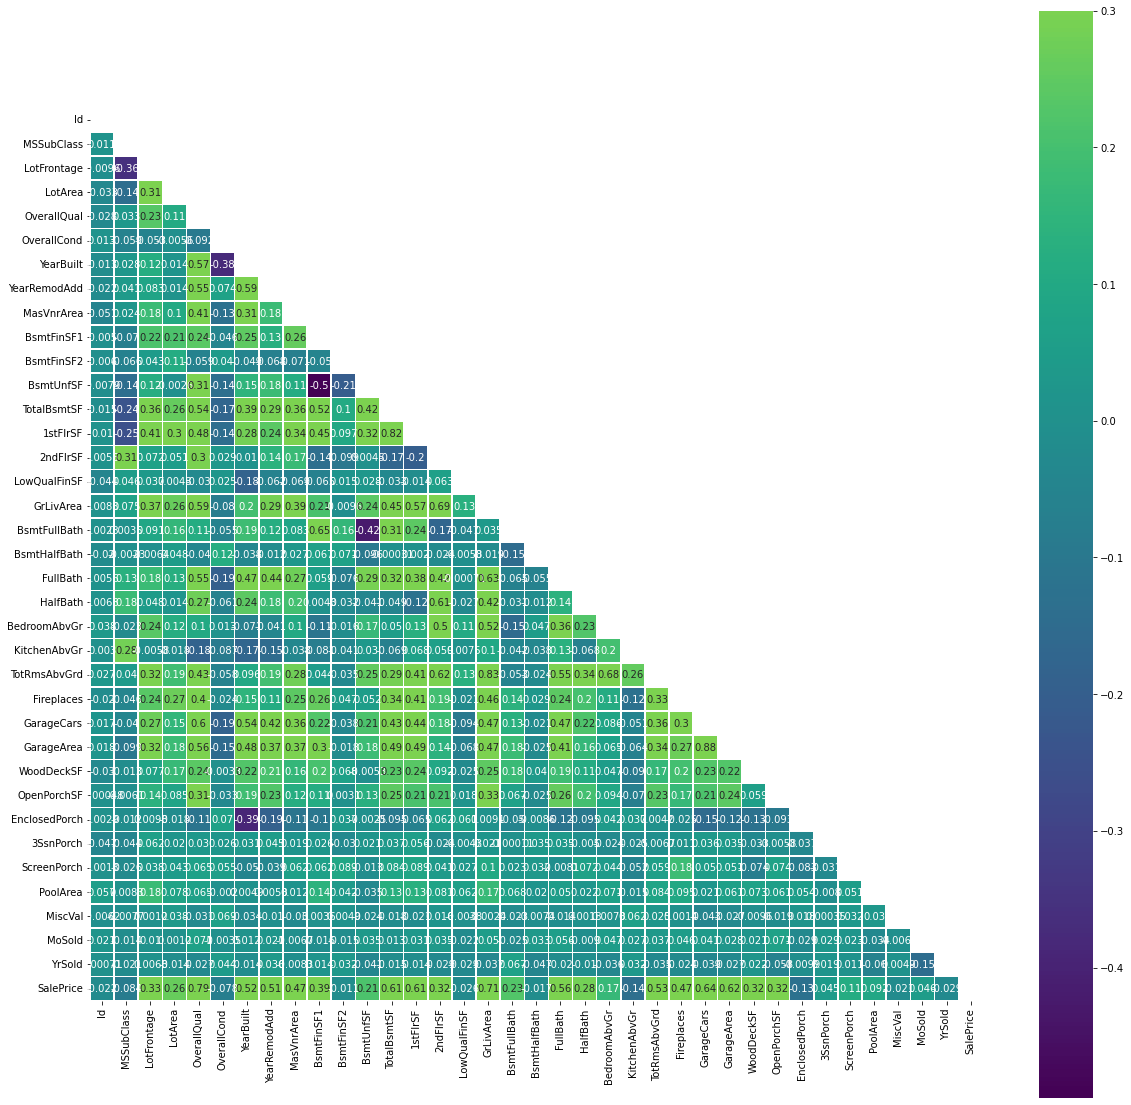

In [688]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True,cmap='viridis', vmax=.3, center=0,
            square=True, linewidths=.5)

### Understand saleprice more

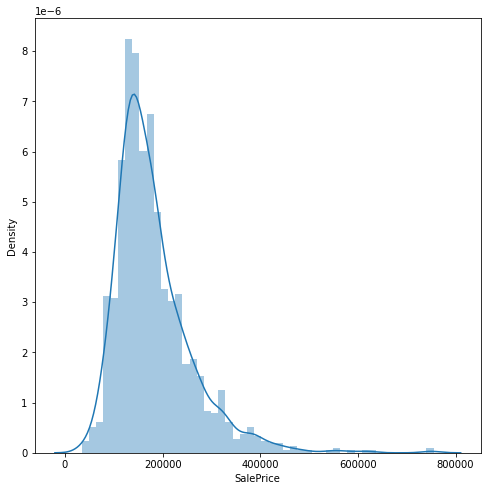

In [689]:
plt.figure(figsize=[8,8])
sns.distplot(df['SalePrice']);

The data looks right skewed. We will need to normalize it

In [690]:
df['SalePrice'].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

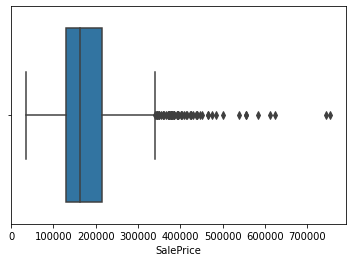

In [691]:
sns.boxplot(df['SalePrice'], orient='h')
plt.show()

In [692]:
df['SalePrice'].skew()

1.8828757597682129

The skewness is greater than 1, so the target variable is highly skewed.

In [693]:
df['SalePrice'].kurt()

6.536281860064529

The kurtosis is greater than 1, so the distribution of target variable is highly peaked.

So, we will log transform our target variable

In [694]:
df['SalePrice'] = np.log(df['SalePrice'])

Check Skew, Kurtosis now

In [695]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

0.12133506220520406
0.8095319958036296


Reduced to one below now

Clearly there seems to be outliers, let us get rid of  them

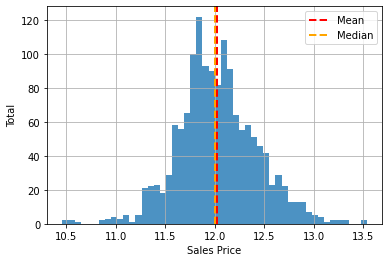

<Figure size 1080x1080 with 0 Axes>

In [696]:
df['SalePrice'].hist(bins=50, alpha=0.8)
plt.axvline(df['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['SalePrice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Sales Price')
plt.ylabel('Total')
plt.legend()
plt.figure(figsize=(15,15))
plt.show()

In [697]:
def removeoutliers(data, m=1.5):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [698]:
toremove = removeoutliers(df['SalePrice']).tolist()
toremove[0:20]

[12.247694320220994,
 12.109010932687042,
 12.31716669303576,
 11.84939770159144,
 12.429216196844383,
 11.870599909242044,
 12.206072645530174,
 11.77452020265869,
 11.678439903447801,
 11.771436160121729,
 11.877568578558138,
 12.540757571577291,
 11.964001084330445,
 11.790557201568507,
 11.911701584927597,
 11.976659481202368,
 11.842229212112828,
 11.845102777308561,
 12.345834587905333,
 11.77452020265869]

In [699]:
toremoveresults = df['SalePrice'].isin(toremove)[0:20].tolist()
toremoveresults

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True]

In [700]:
outliers = dict(zip(toremove, toremoveresults))
outliers

{12.247694320220994: True,
 12.109010932687042: True,
 12.31716669303576: True,
 11.84939770159144: True,
 12.429216196844383: True,
 11.870599909242044: True,
 12.206072645530174: False,
 11.77452020265869: True,
 11.678439903447801: True,
 11.771436160121729: True,
 11.877568578558138: True,
 12.540757571577291: False,
 11.964001084330445: True,
 11.790557201568507: True,
 11.911701584927597: True,
 11.976659481202368: True,
 11.842229212112828: True,
 11.845102777308561: False,
 12.345834587905333: True}

In [701]:
df = df[~df['SalePrice'].isin(toremove) == False]

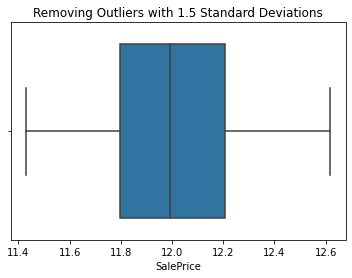

In [702]:
sns.boxplot(df['SalePrice'], orient='h').set_title('Removing Outliers with 1.5 Standard Deviations')
plt.show()

The data of sales price now looks good.

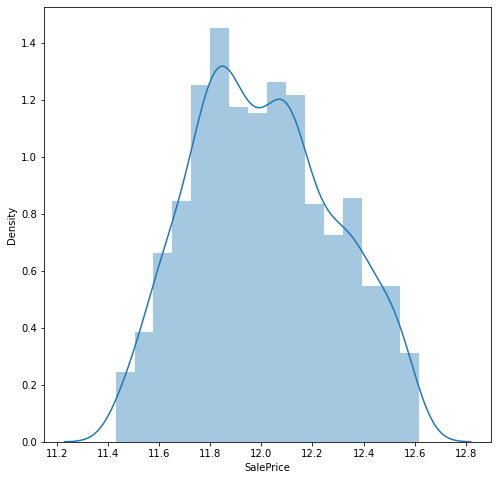

In [703]:
plt.figure(figsize=[8,8])
sns.distplot(df['SalePrice']);

SalesPrice now seems to be have normal distribution

### Analyze numerical columns

In [704]:
# Function to plot histogram, probplot and boxplot for numerical analysis
def plotNumericalDiagnostics(df,var_col, no_of_bins):
  
  print(f"Total NA enties {df[var_col].isnull().mean()} \n")
  print(df[var_col].describe().to_frame().T,'\n')
  plt.figure(figsize=(18,6))
  
  plt.subplot(1,3,1)
  sns.histplot(df[var_col], bins=no_of_bins)
  plt.title(f'Histogram for varibale {var_col}')

  plt.subplot(1, 3, 2)
  sns.boxplot(y=df[var_col])
  plt.title(f'Boxplot for variable {var_col}')

  plt.subplot(1, 3, 3)
  stats.probplot(df[var_col], dist="norm", plot=plt)
  plt.title(f'Probplot for varibale {var_col}')

  plt.show()

Get all numeric columns



In [705]:
numeric_columns = df.select_dtypes(exclude=[object]).columns.tolist()
#numeric_columns

Total NA enties 0.0 

     count   mean    std  min    25%    50%     75%     max
Id 1260.00 739.87 422.54 1.00 371.75 752.50 1110.25 1460.00 



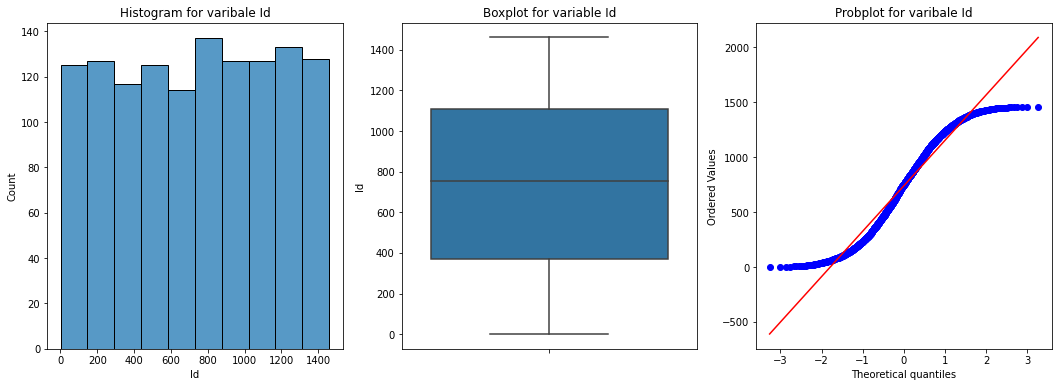

Total NA enties 0.0 

             count  mean   std   min   25%   50%   75%    max
MSSubClass 1260.00 57.15 41.93 20.00 20.00 50.00 70.00 190.00 



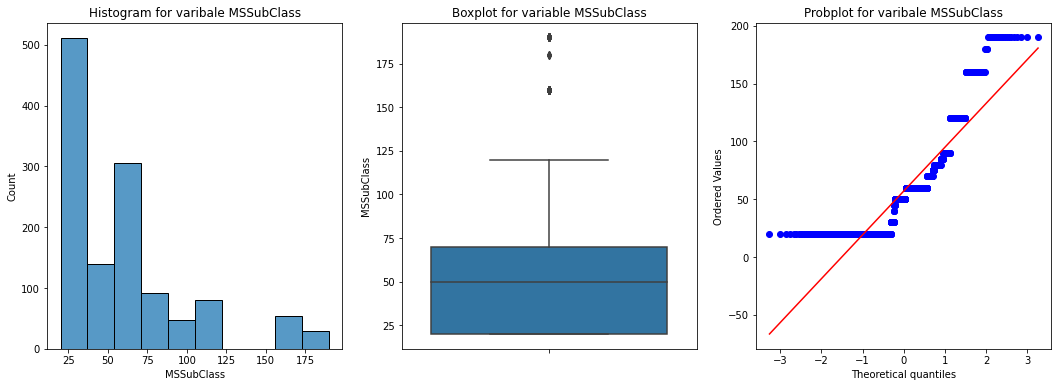

Total NA enties 0.0 

              count  mean   std   min   25%   50%   75%    max
LotFrontage 1260.00 69.57 21.12 21.00 60.00 70.05 77.00 313.00 



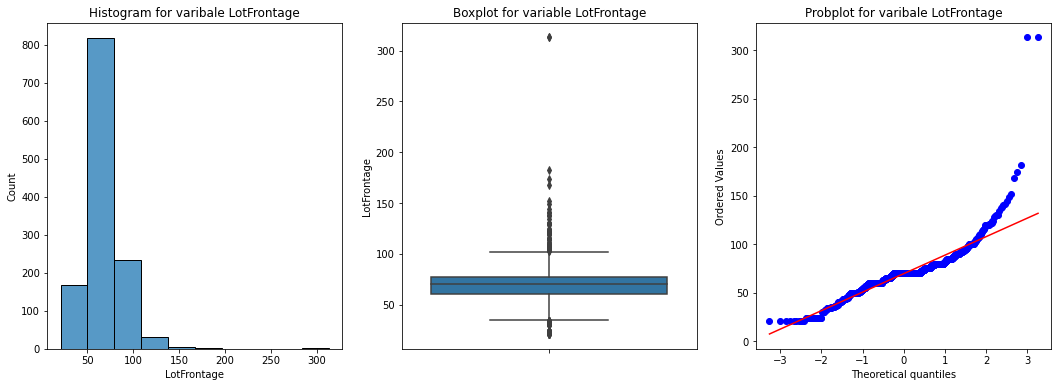

Total NA enties 0.0 

          count     mean     std     min     25%     50%      75%       max
LotArea 1260.00 10296.23 8644.13 1300.00 7560.00 9356.50 11292.75 164660.00 



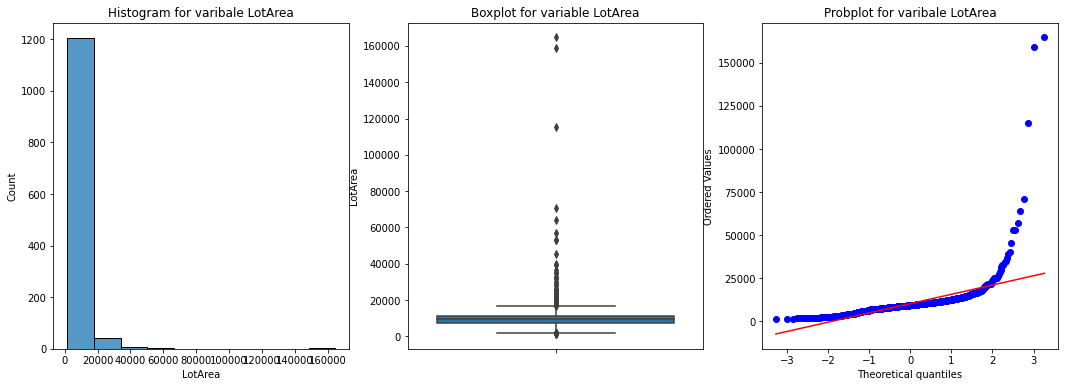

Total NA enties 0.0 

              count  mean  std  min  25%  50%  75%   max
OverallQual 1260.00  6.01 1.14 3.00 5.00 6.00 7.00 10.00 



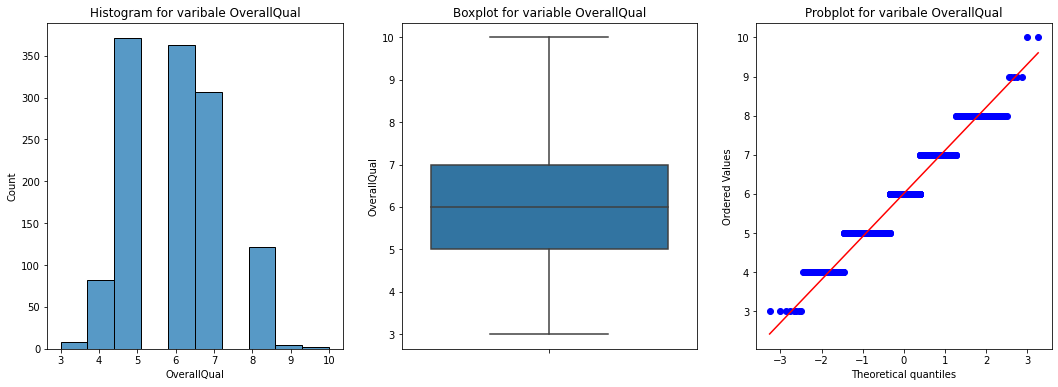

Total NA enties 0.0 

              count  mean  std  min  25%  50%  75%  max
OverallCond 1260.00  5.65 1.07 3.00 5.00 5.00 6.00 9.00 



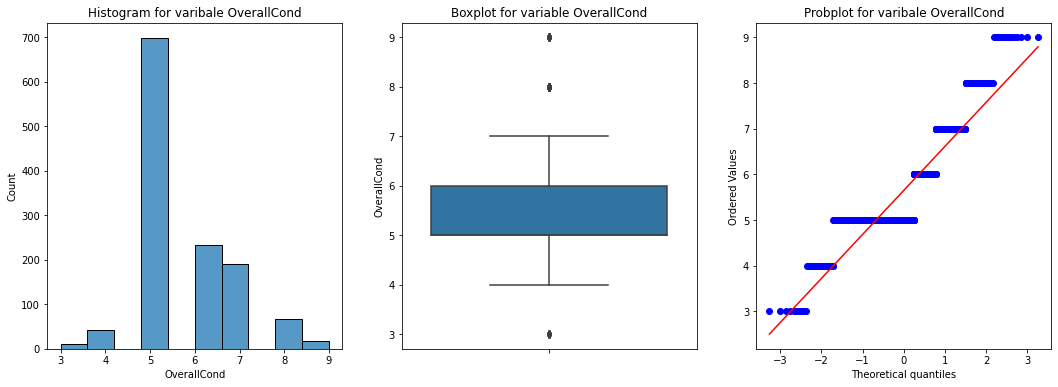

Total NA enties 0.0 

            count    mean   std     min     25%     50%     75%     max
YearBuilt 1260.00 1971.16 29.22 1872.00 1955.00 1972.00 1999.00 2009.00 



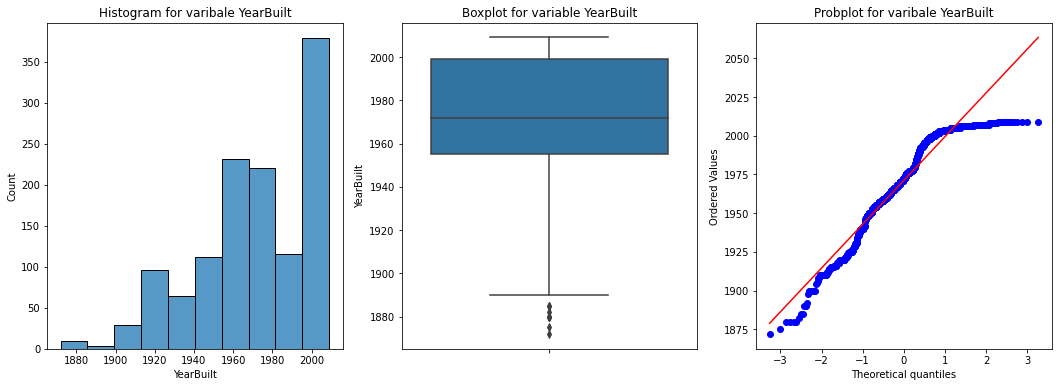

Total NA enties 0.0 

               count    mean   std     min     25%     50%     75%     max
YearRemodAdd 1260.00 1984.72 20.11 1950.00 1967.00 1992.50 2003.00 2010.00 



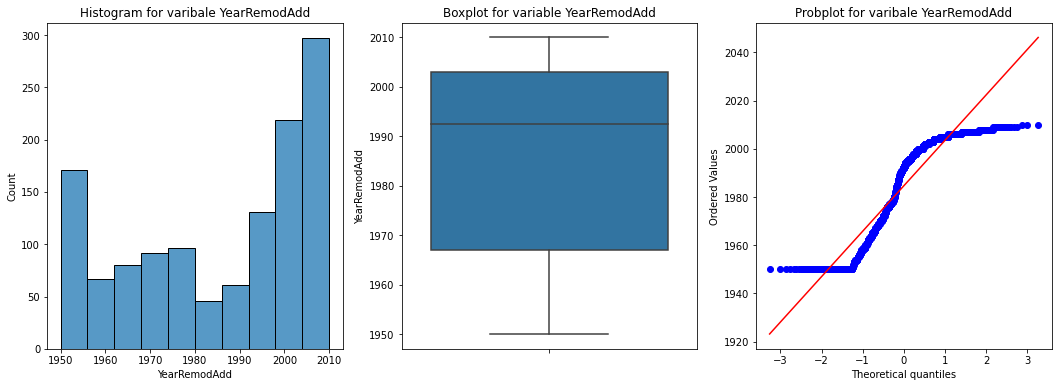

Total NA enties 0.0 

             count  mean    std  min  25%  50%    75%     max
MasVnrArea 1260.00 86.80 155.02 0.00 0.00 0.00 136.00 1600.00 



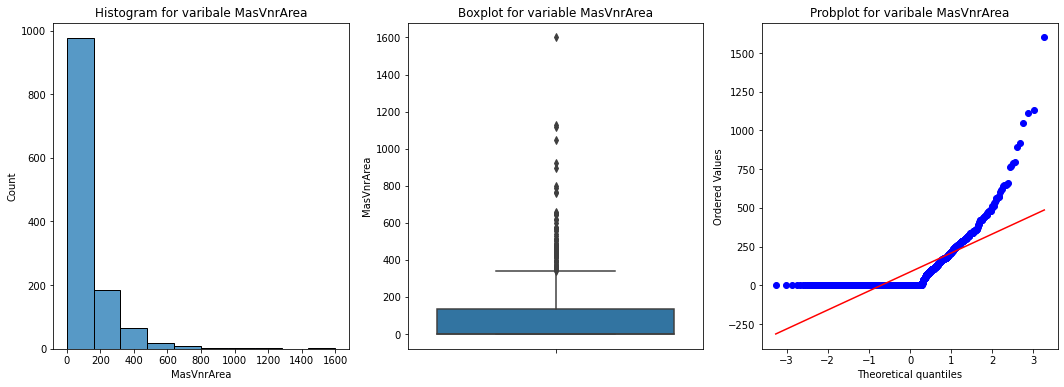

Total NA enties 0.0 

             count   mean    std  min  25%    50%    75%     max
BsmtFinSF1 1260.00 420.90 421.39 0.00 0.00 385.50 686.00 5644.00 



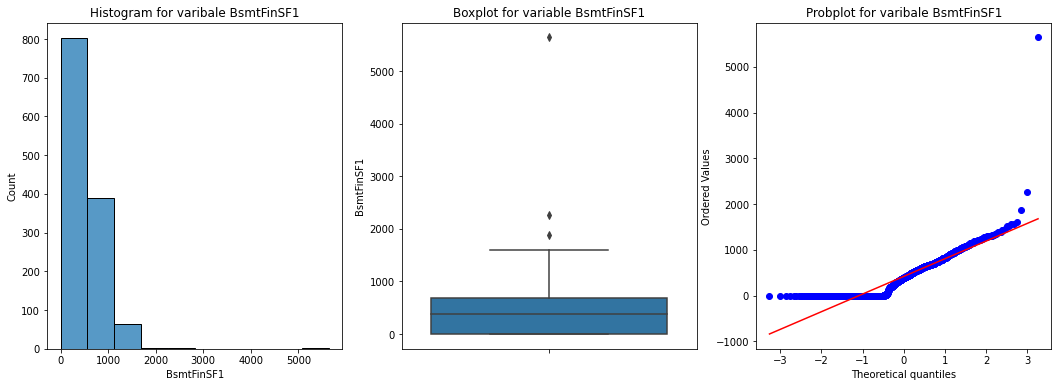

Total NA enties 0.0 

             count  mean    std  min  25%  50%  75%     max
BsmtFinSF2 1260.00 50.92 168.98 0.00 0.00 0.00 0.00 1474.00 



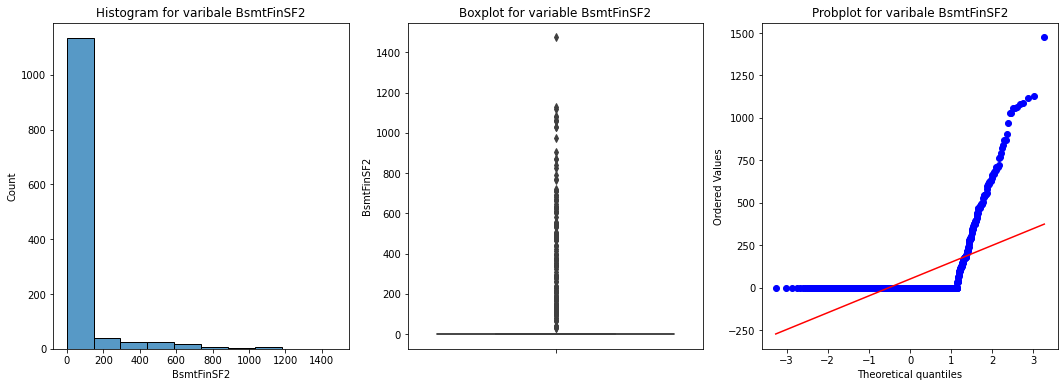

Total NA enties 0.0 

            count   mean    std  min    25%    50%    75%     max
BsmtUnfSF 1260.00 563.79 429.95 0.00 222.50 469.00 815.25 2042.00 



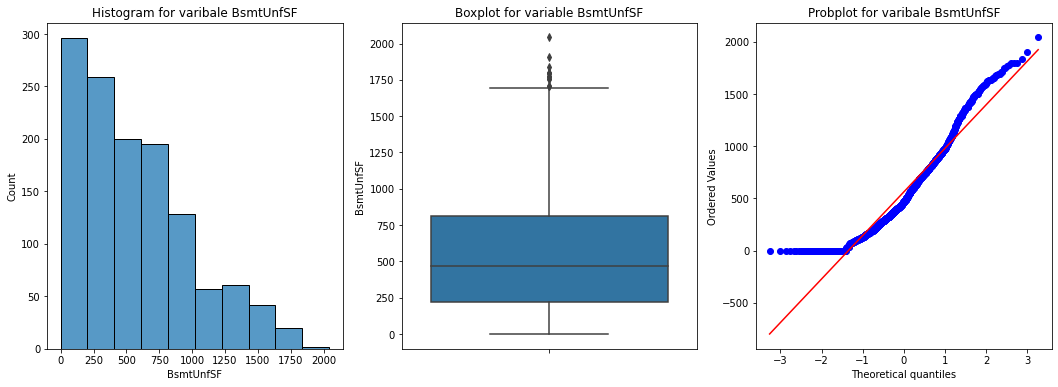

Total NA enties 0.0 

              count    mean    std  min    25%    50%     75%     max
TotalBsmtSF 1260.00 1035.62 389.70 0.00 806.00 980.00 1248.00 6110.00 



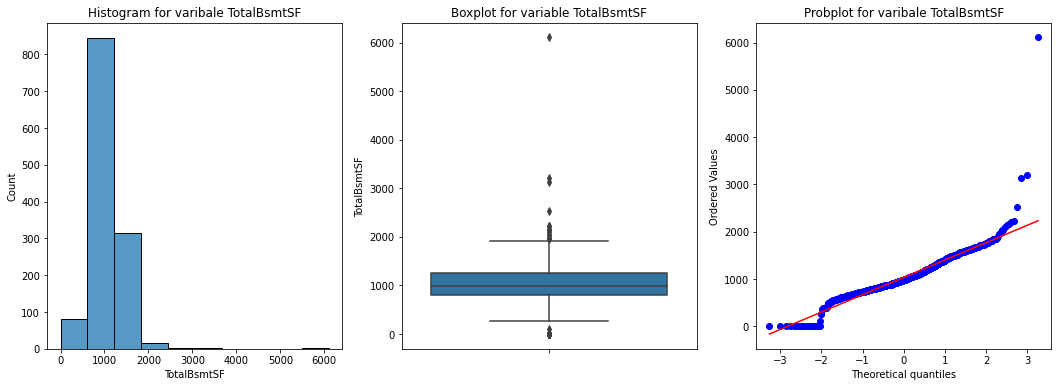

Total NA enties 0.0 

           count    mean    std    min    25%     50%     75%     max
1stFlrSF 1260.00 1139.77 347.70 483.00 888.00 1073.50 1342.50 4692.00 



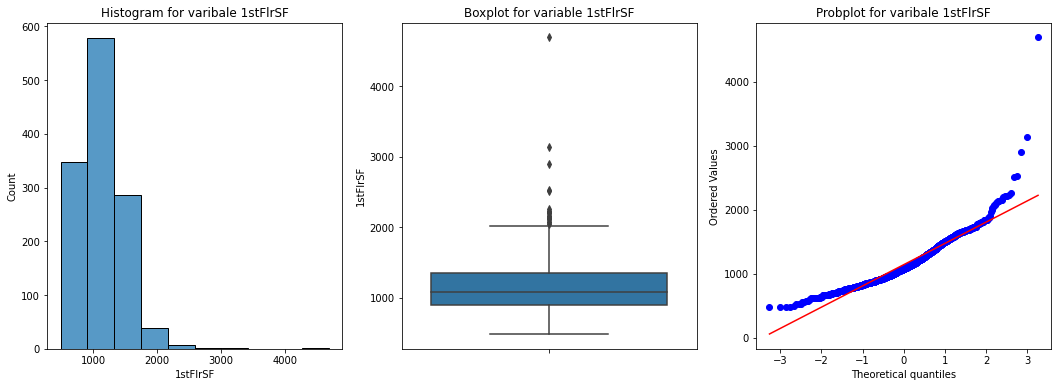

Total NA enties 0.0 

           count   mean    std  min  25%  50%    75%     max
2ndFlrSF 1260.00 338.64 417.90 0.00 0.00 0.00 728.00 1818.00 



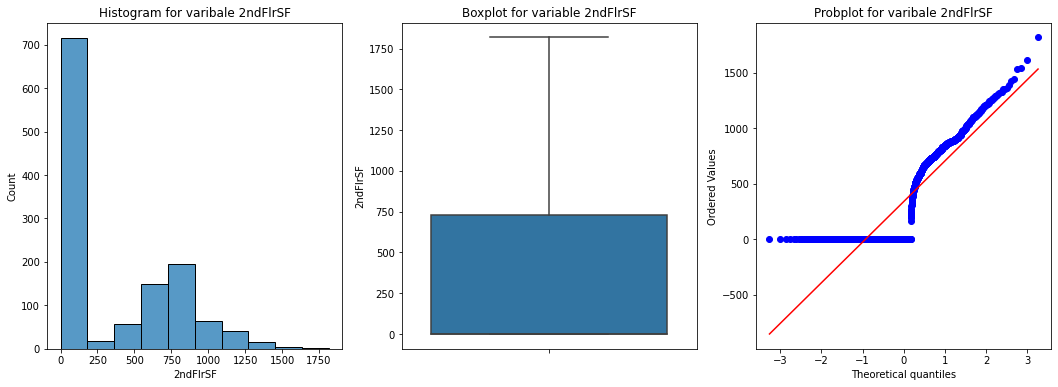

Total NA enties 0.0 

               count  mean   std  min  25%  50%  75%    max
LowQualFinSF 1260.00  5.60 47.08 0.00 0.00 0.00 0.00 528.00 



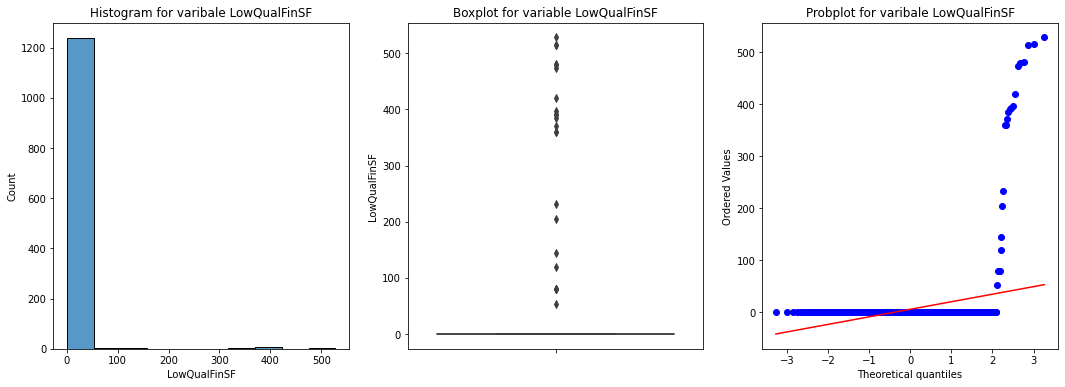

Total NA enties 0.0 

            count    mean    std    min     25%     50%     75%     max
GrLivArea 1260.00 1484.01 456.20 630.00 1148.00 1454.50 1721.00 5642.00 



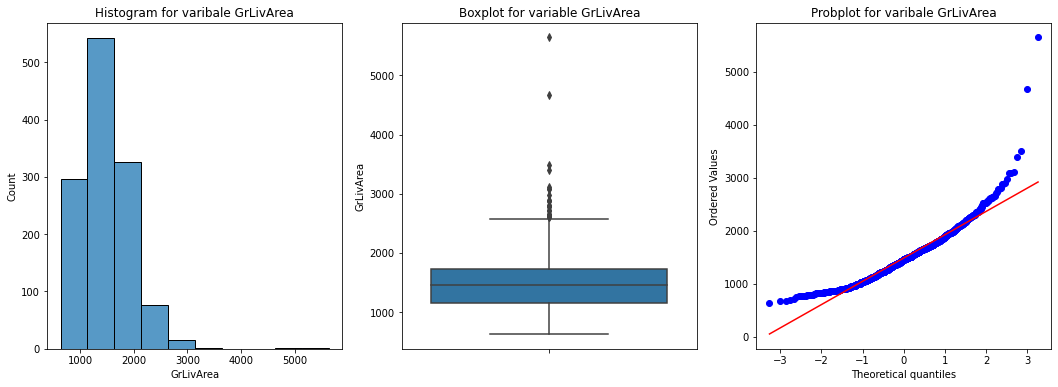

Total NA enties 0.0 

               count  mean  std  min  25%  50%  75%  max
BsmtFullBath 1260.00  0.41 0.52 0.00 0.00 0.00 1.00 3.00 



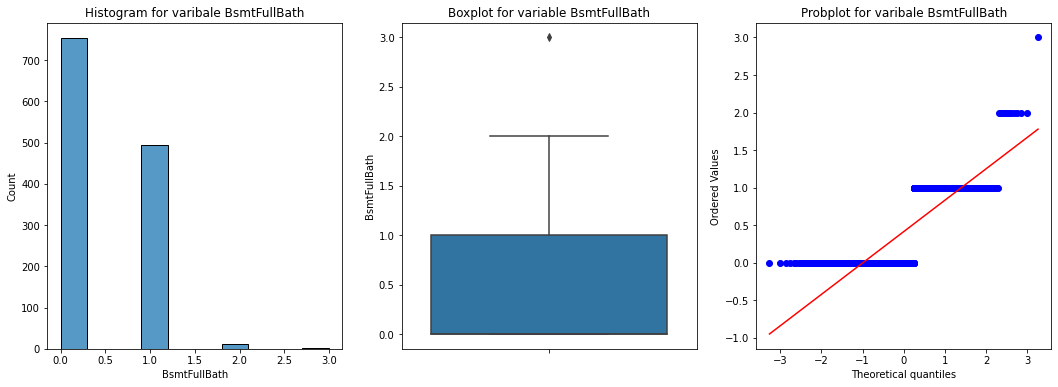

Total NA enties 0.0 

               count  mean  std  min  25%  50%  75%  max
BsmtHalfBath 1260.00  0.06 0.25 0.00 0.00 0.00 0.00 2.00 



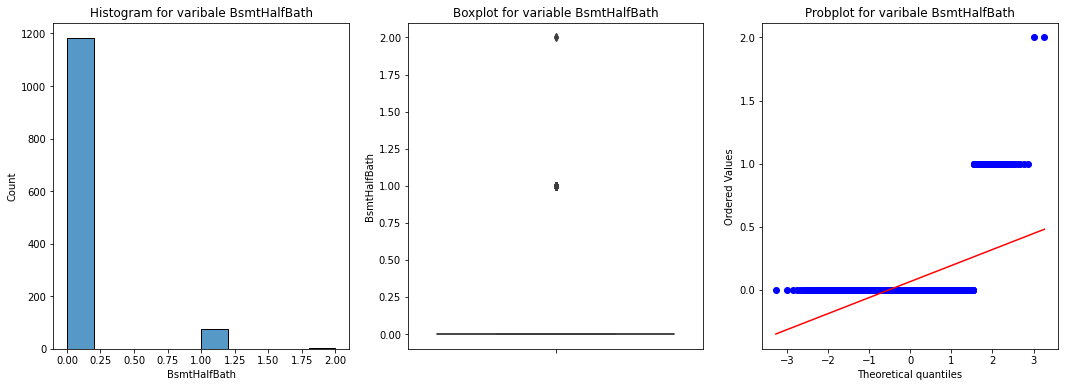

Total NA enties 0.0 

           count  mean  std  min  25%  50%  75%  max
FullBath 1260.00  1.55 0.53 0.00 1.00 2.00 2.00 3.00 



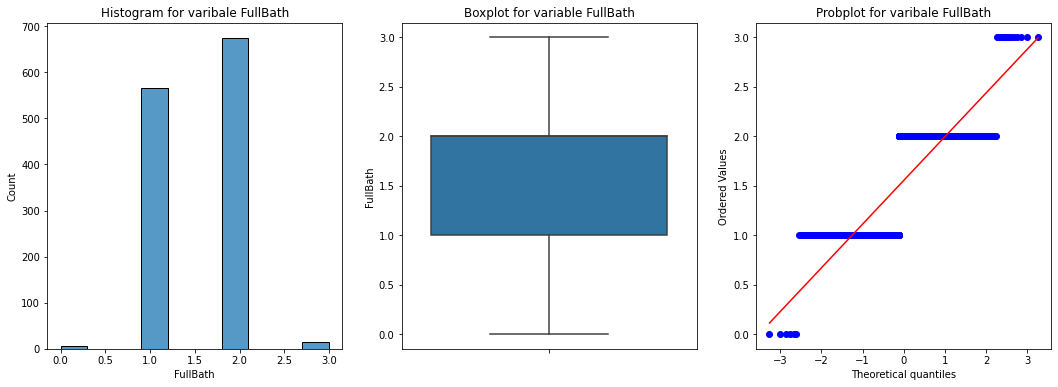

Total NA enties 0.0 

           count  mean  std  min  25%  50%  75%  max
HalfBath 1260.00  0.38 0.51 0.00 0.00 0.00 1.00 2.00 



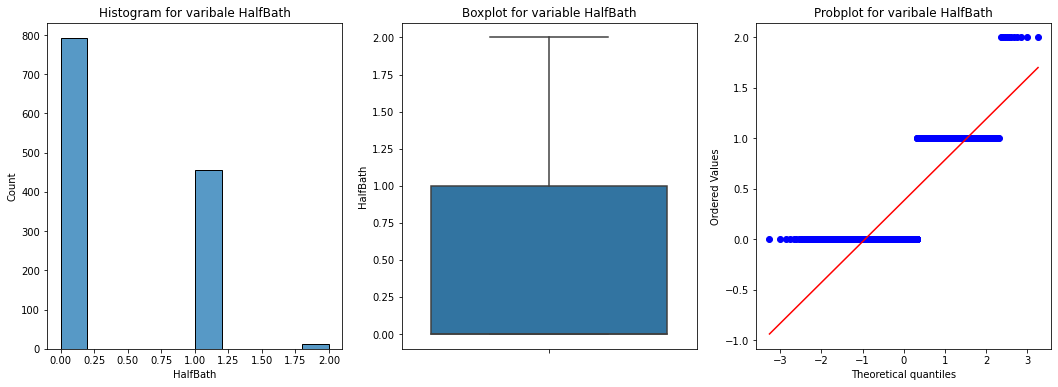

Total NA enties 0.0 

               count  mean  std  min  25%  50%  75%  max
BedroomAbvGr 1260.00  2.89 0.79 0.00 2.00 3.00 3.00 8.00 



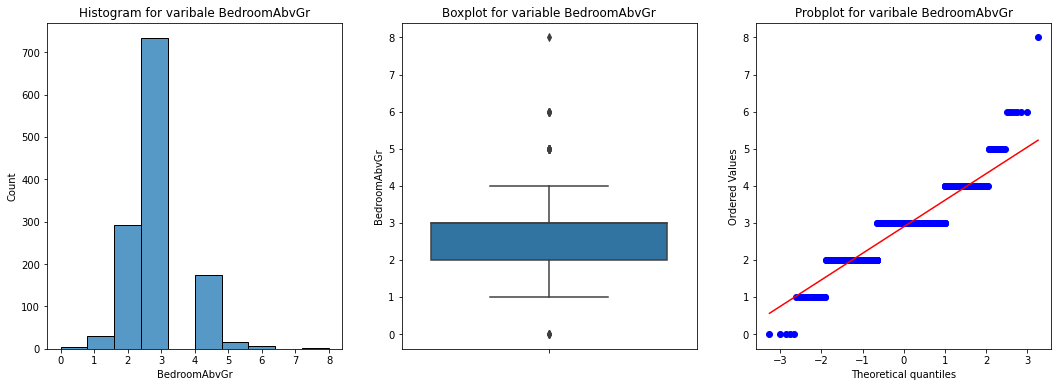

Total NA enties 0.0 

               count  mean  std  min  25%  50%  75%  max
KitchenAbvGr 1260.00  1.05 0.23 0.00 1.00 1.00 1.00 3.00 



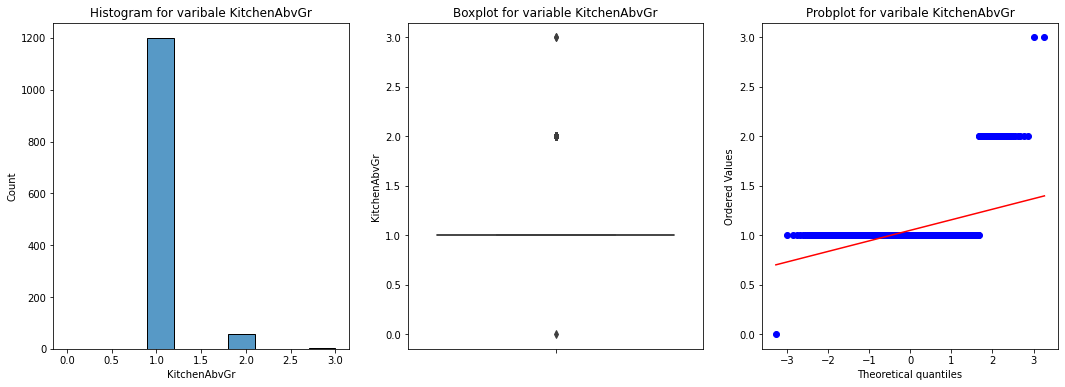

Total NA enties 0.0 

               count  mean  std  min  25%  50%  75%   max
TotRmsAbvGrd 1260.00  6.45 1.49 3.00 5.00 6.00 7.00 14.00 



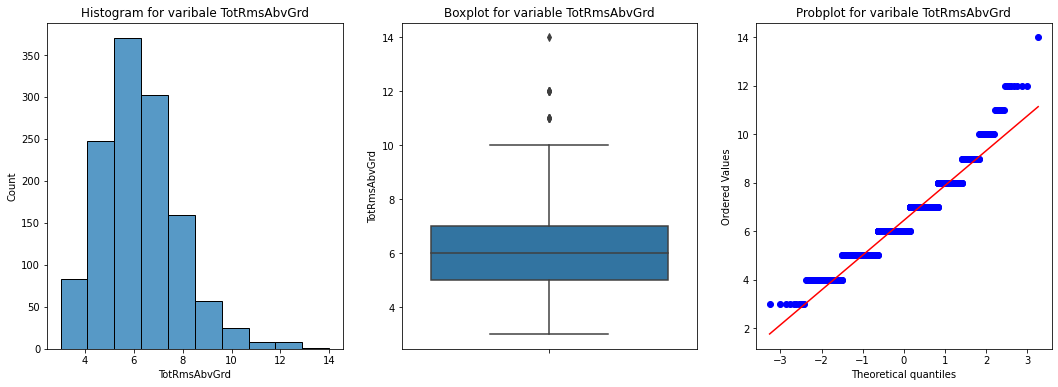

Total NA enties 0.0 

             count  mean  std  min  25%  50%  75%  max
Fireplaces 1260.00  0.60 0.63 0.00 0.00 1.00 1.00 3.00 



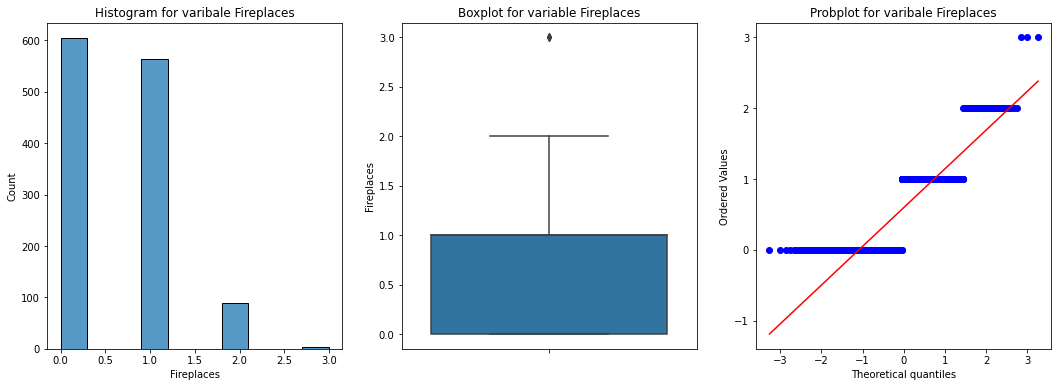

Total NA enties 0.0 

             count  mean  std  min  25%  50%  75%  max
GarageCars 1260.00  1.74 0.66 0.00 1.00 2.00 2.00 4.00 



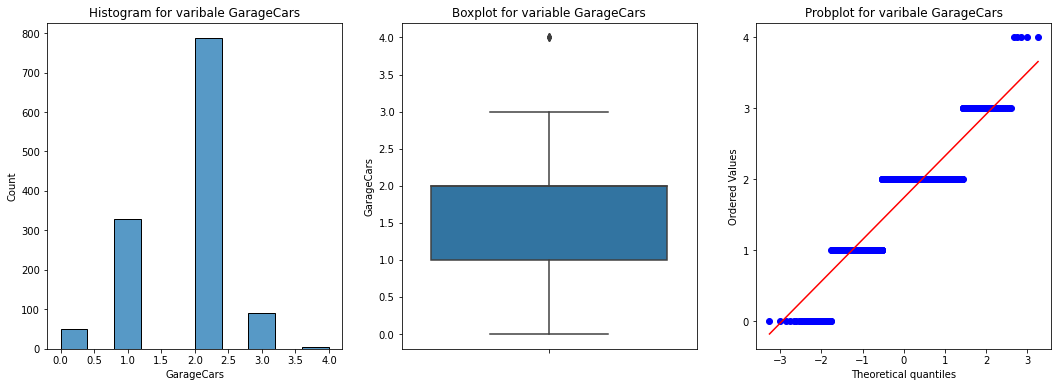

Total NA enties 0.0 

             count   mean    std  min    25%    50%    75%     max
GarageArea 1260.00 464.48 188.45 0.00 341.00 473.50 570.50 1418.00 



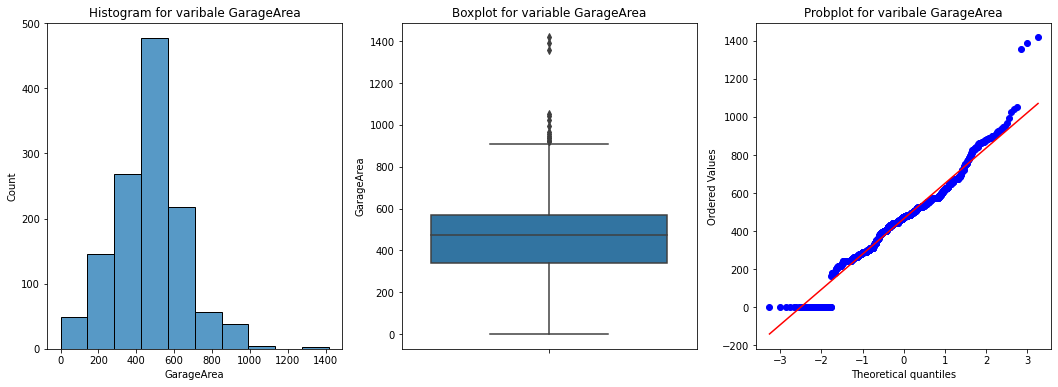

Total NA enties 0.0 

             count  mean    std  min  25%  50%    75%    max
WoodDeckSF 1260.00 89.95 121.51 0.00 0.00 0.00 161.00 736.00 



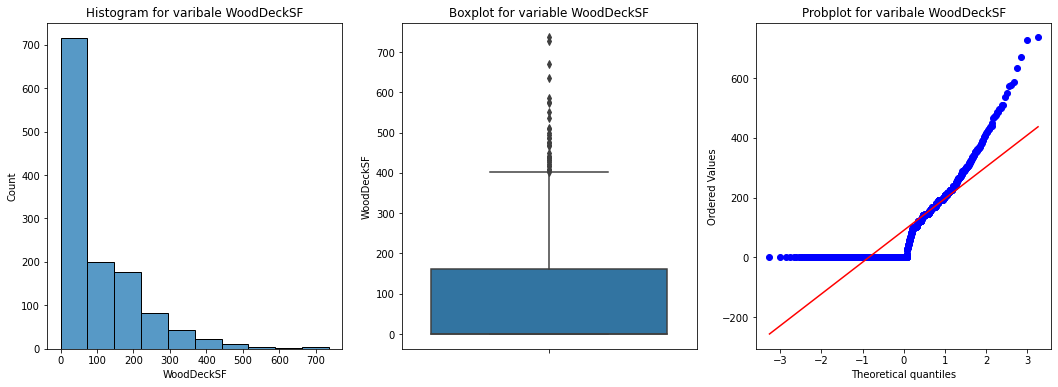

Total NA enties 0.0 

              count  mean   std  min  25%   50%   75%    max
OpenPorchSF 1260.00 44.71 63.58 0.00 0.00 24.00 64.00 547.00 



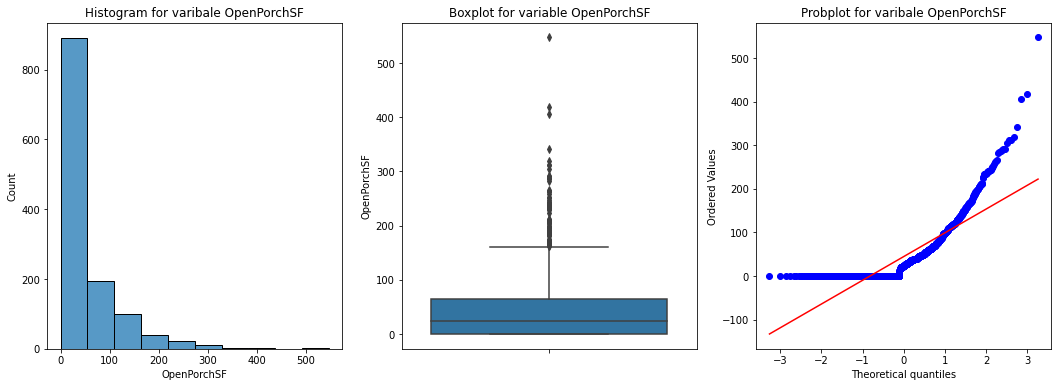

Total NA enties 0.0 

                count  mean   std  min  25%  50%  75%    max
EnclosedPorch 1260.00 21.71 61.50 0.00 0.00 0.00 0.00 552.00 



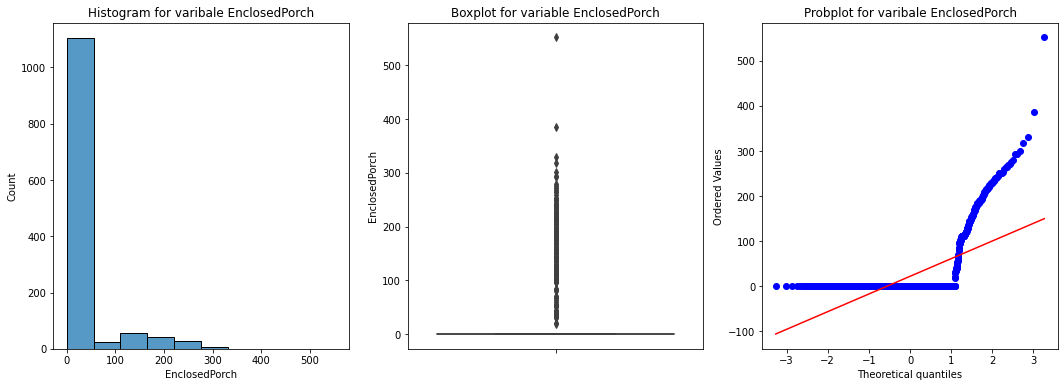

Total NA enties 0.0 

            count  mean   std  min  25%  50%  75%    max
3SsnPorch 1260.00  3.45 29.72 0.00 0.00 0.00 0.00 508.00 



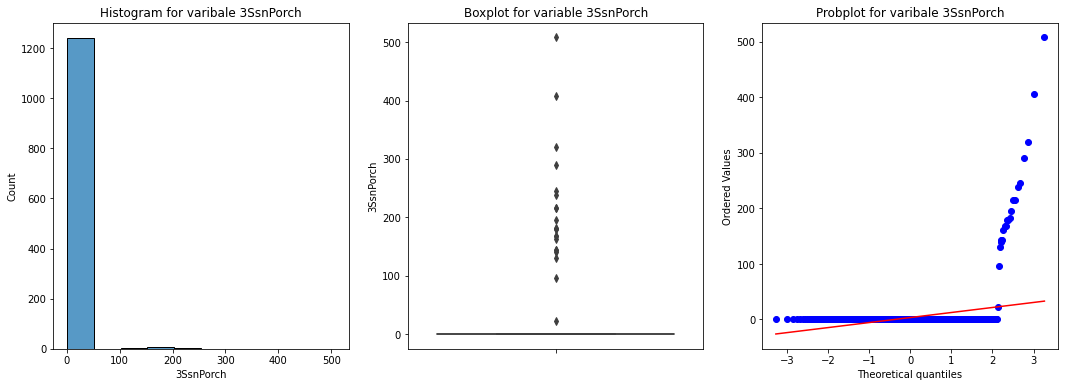

Total NA enties 0.0 

              count  mean   std  min  25%  50%  75%    max
ScreenPorch 1260.00 15.50 56.28 0.00 0.00 0.00 0.00 480.00 



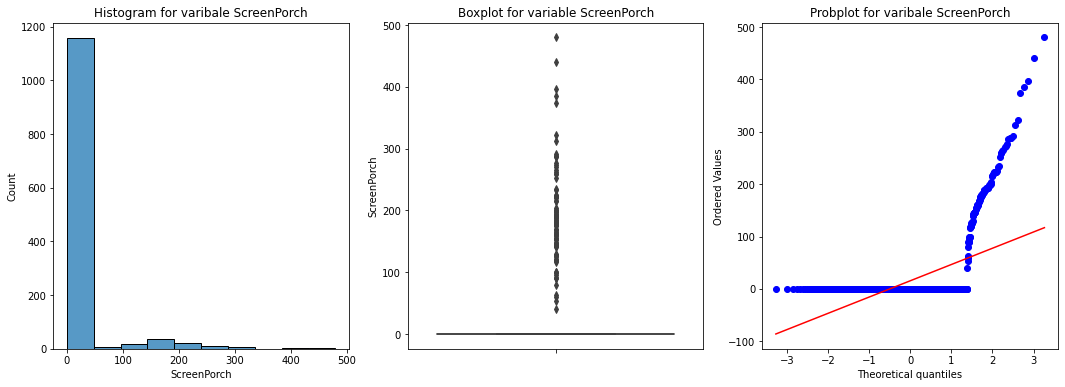

Total NA enties 0.0 

           count  mean   std  min  25%  50%  75%    max
PoolArea 1260.00  2.76 40.34 0.00 0.00 0.00 0.00 738.00 



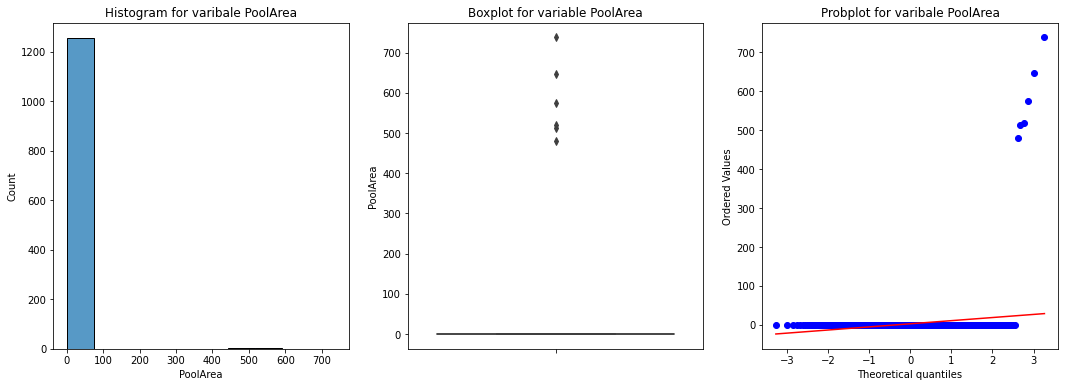

Total NA enties 0.0 

          count  mean    std  min  25%  50%  75%      max
MiscVal 1260.00 45.09 523.77 0.00 0.00 0.00 0.00 15500.00 



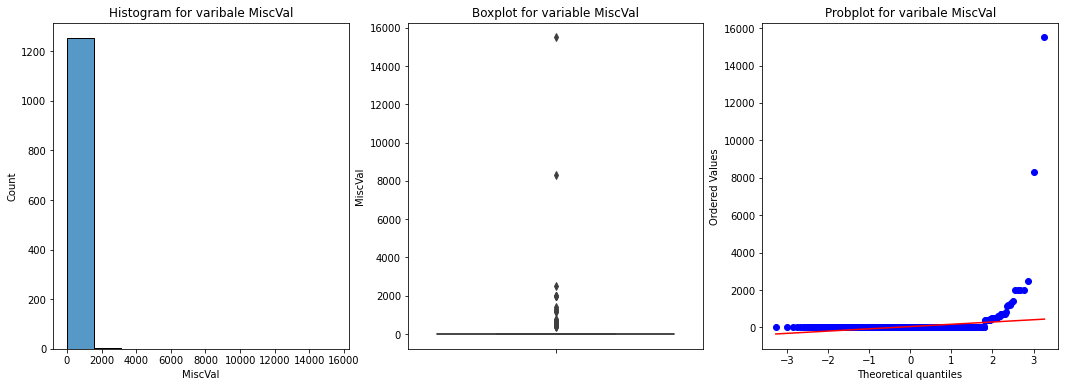

Total NA enties 0.0 

         count  mean  std  min  25%  50%  75%   max
MoSold 1260.00  6.30 2.68 1.00 5.00 6.00 8.00 12.00 



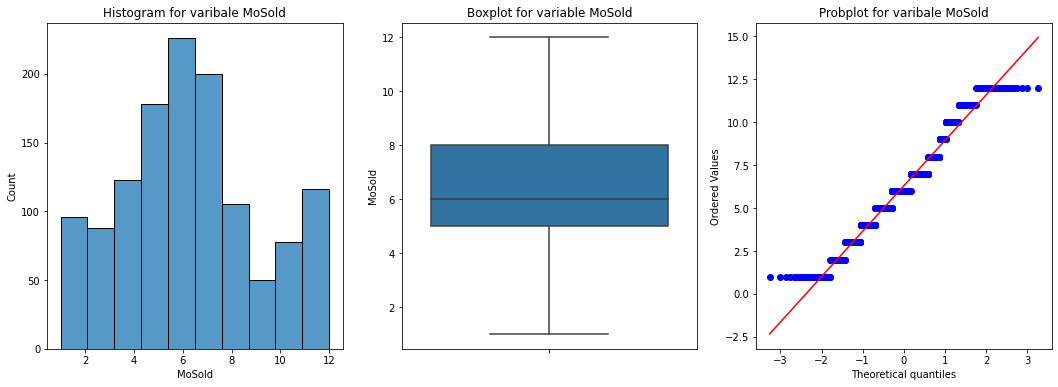

Total NA enties 0.0 

         count    mean  std     min     25%     50%     75%     max
YrSold 1260.00 2007.81 1.32 2006.00 2007.00 2008.00 2009.00 2010.00 



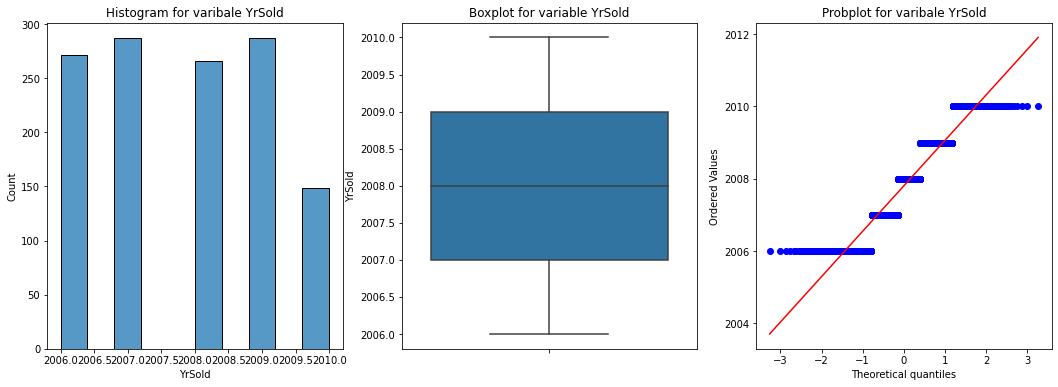

Total NA enties 0.0 

            count  mean  std   min   25%   50%   75%   max
SalePrice 1260.00 12.01 0.28 11.43 11.80 11.99 12.21 12.62 



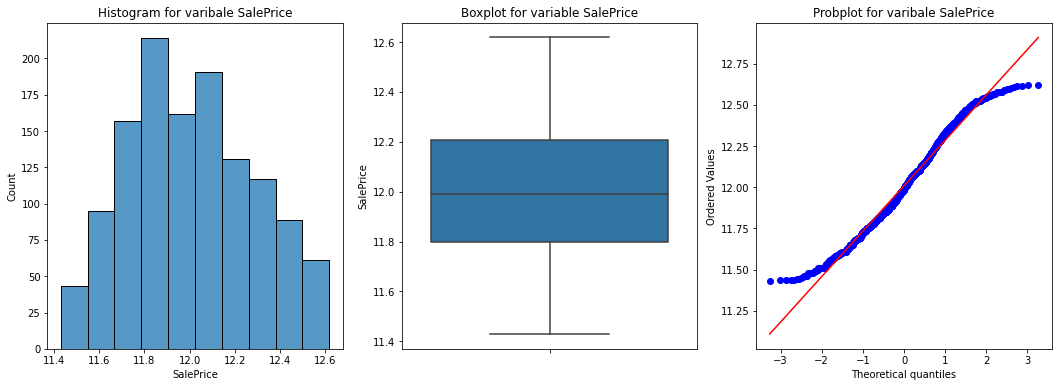

In [706]:
for col in numeric_columns:
  plotNumericalDiagnostics(df,col,10)

## Outlier treatment

In [707]:
for col in df.select_dtypes(exclude=[object]).columns:
   df[col][df[col] <= df[col].quantile(0.05)] = df[col].quantile(0.05)
   df[col][df[col] >= df[col].quantile(0.95)] = df[col].quantile(0.95)

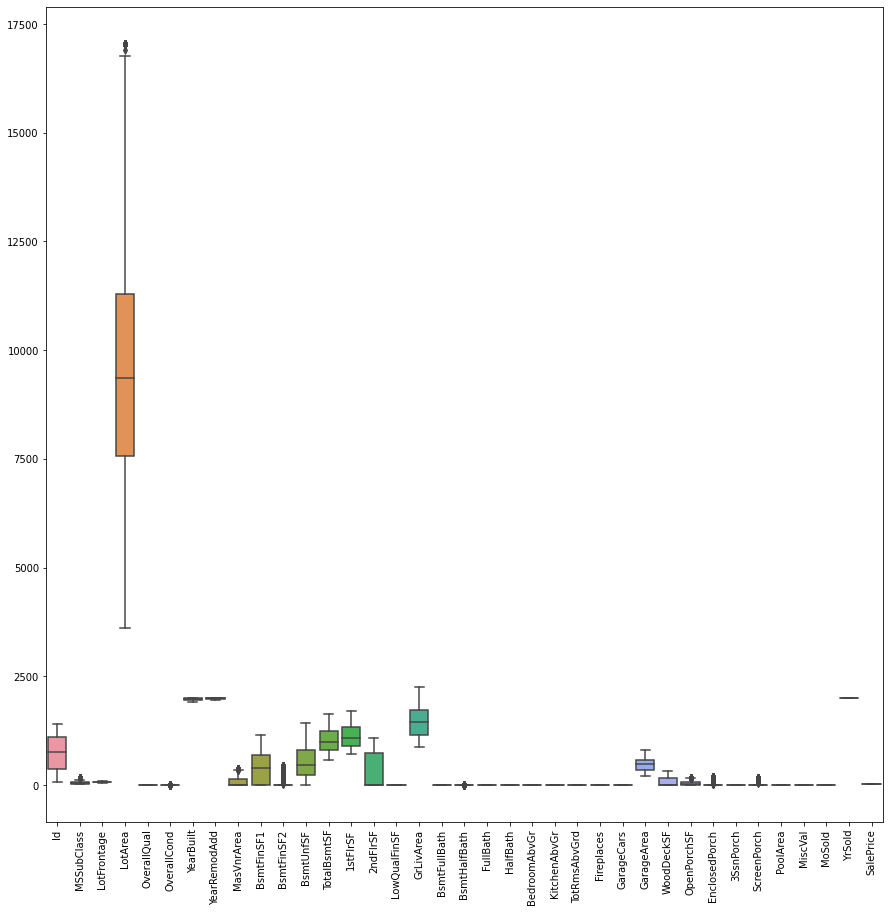

In [708]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']));

## Analyzing categorical columns

In [709]:
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].unique(), '\n')

MSZoning
['RL' 'RM' 'FV' 'C (all)' 'RH'] 

Street
['Pave' 'Grvl'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'HLS' 'Low'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'NWAmes' 'OldTown'
 'BrkSide' 'Sawyer' 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV' 'NridgHt'
 'Timber' 'Somerst' 'Gilbert' 'ClearCr' 'Edwards' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'Feedr' 'PosN' 'RRNn' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl
['CompShg' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'WdShngl' 'Roll'
 'ClyTile'] 

Exterior1st
['VinylSd' 'MetalSd' 'Wd 

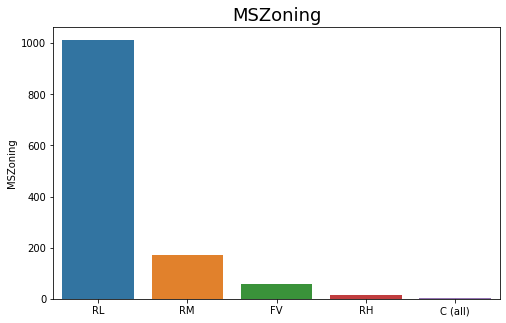

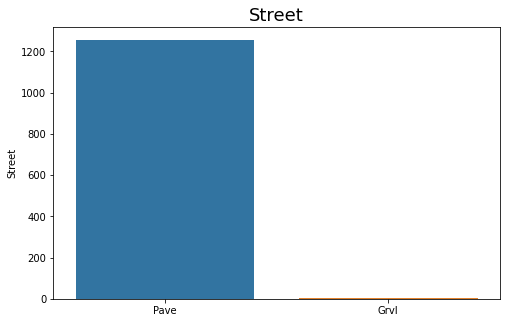

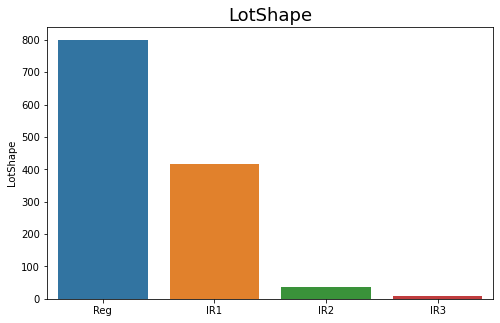

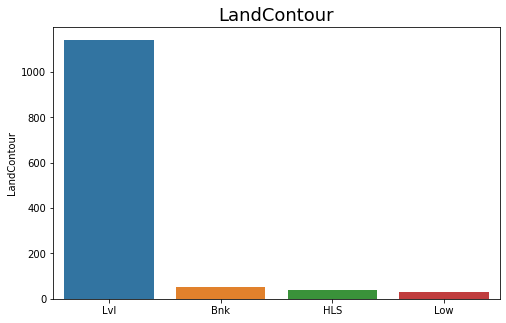

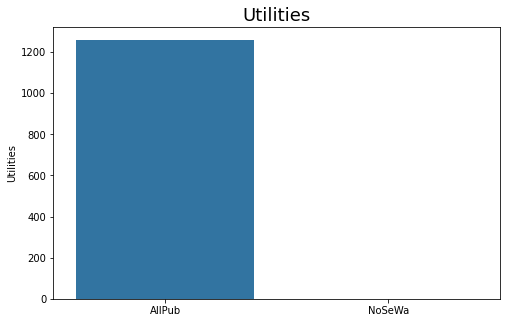

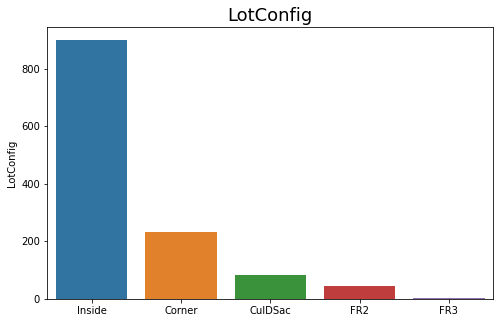

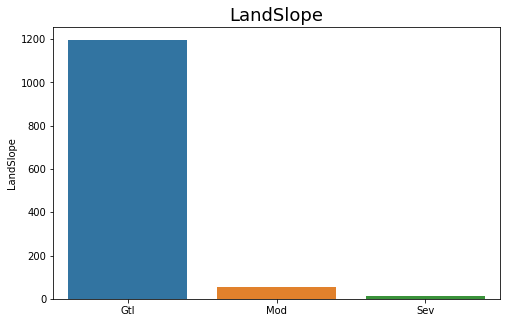

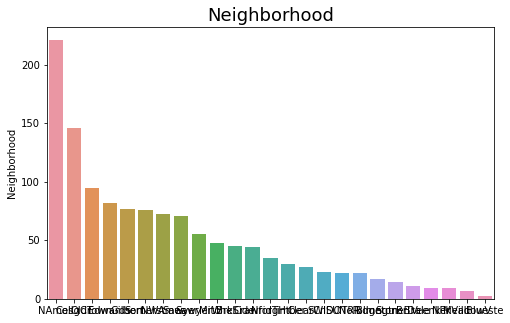

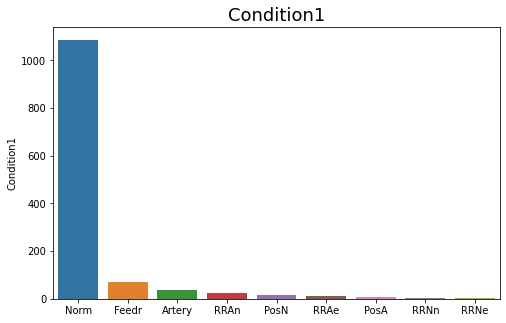

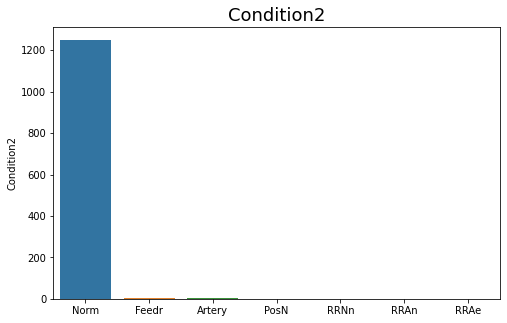

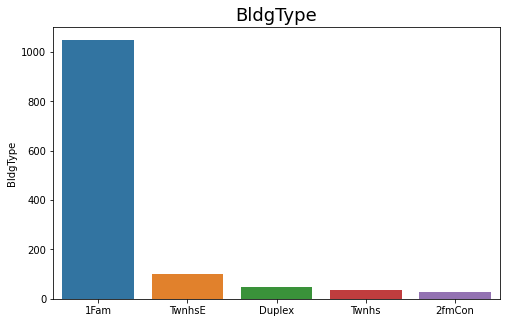

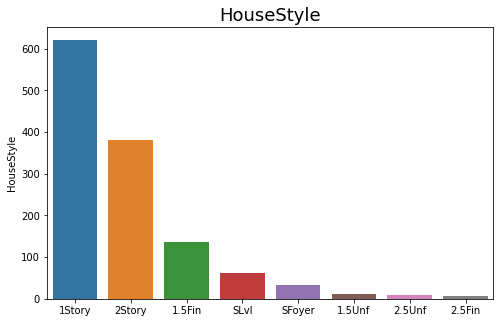

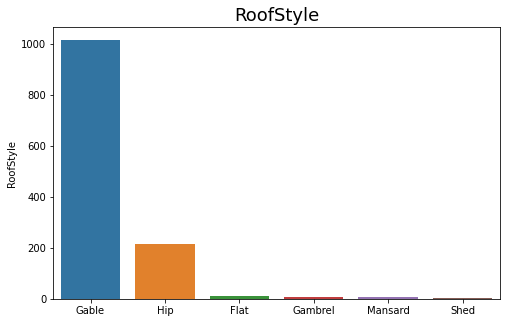

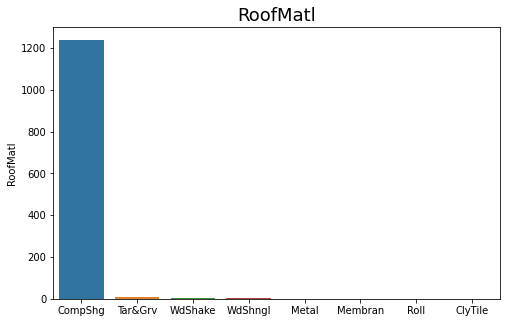

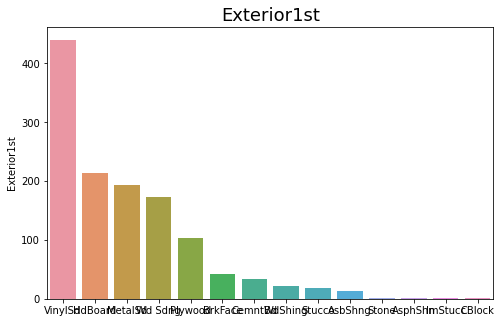

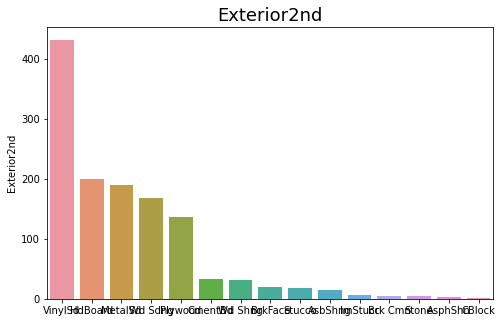

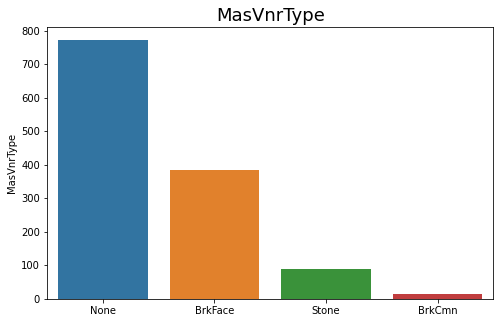

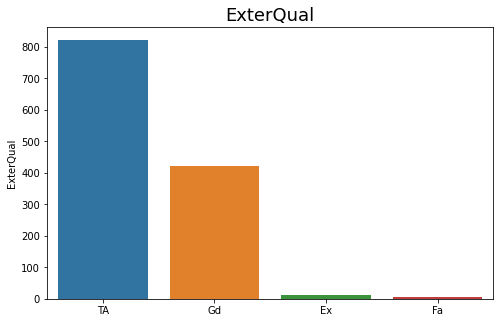

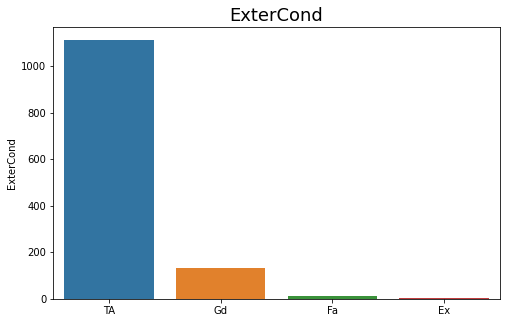

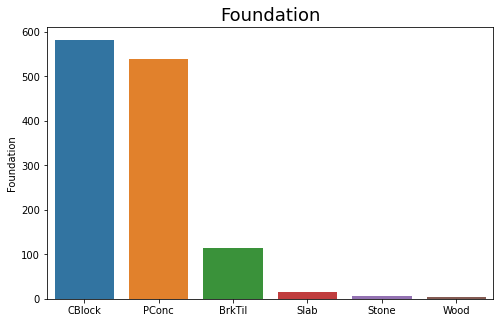

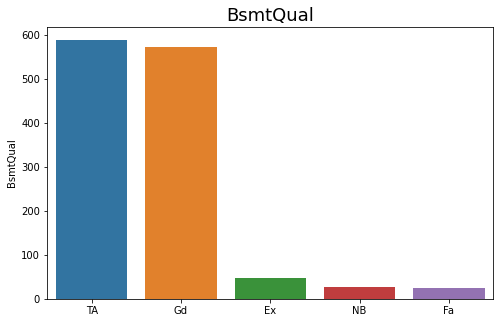

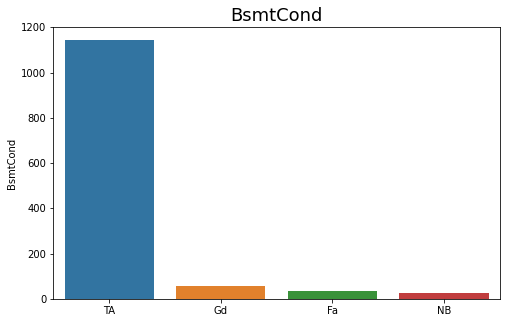

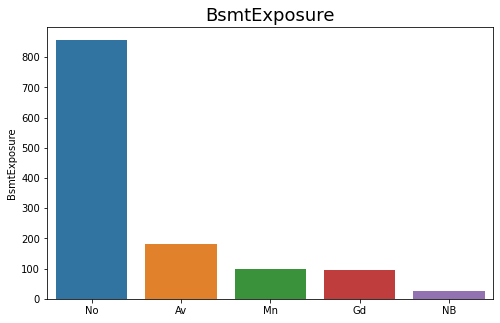

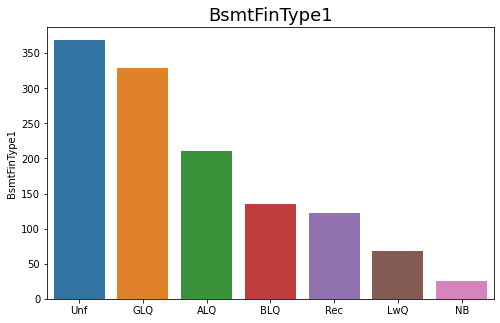

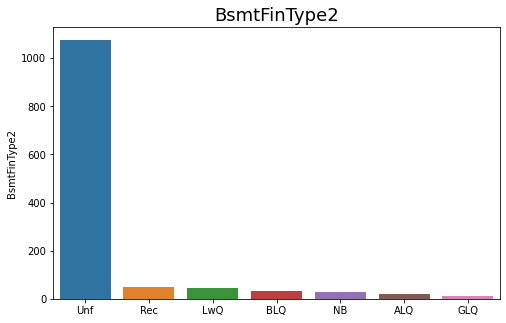

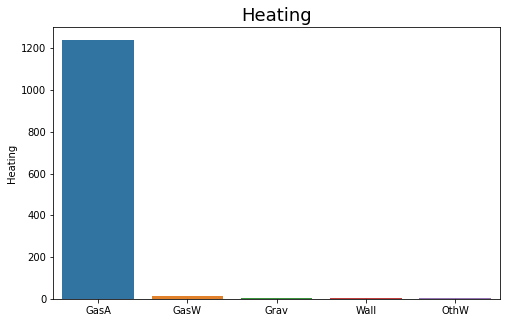

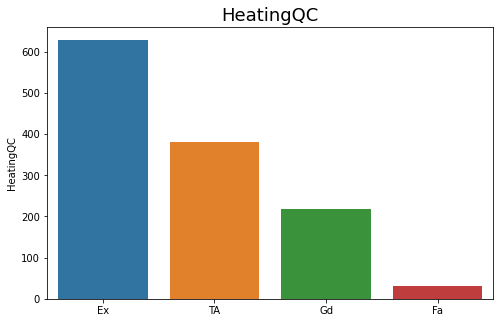

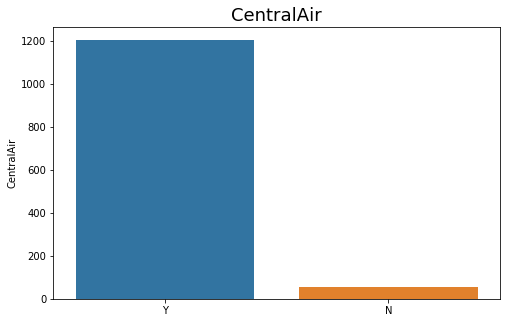

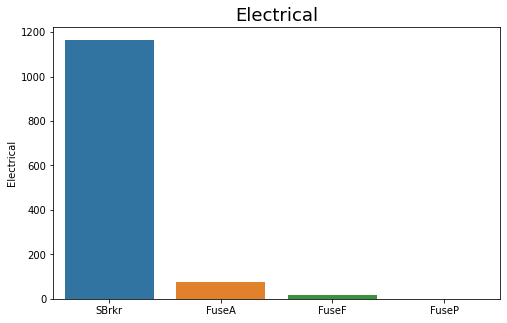

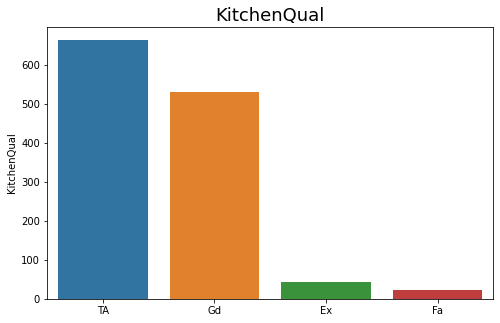

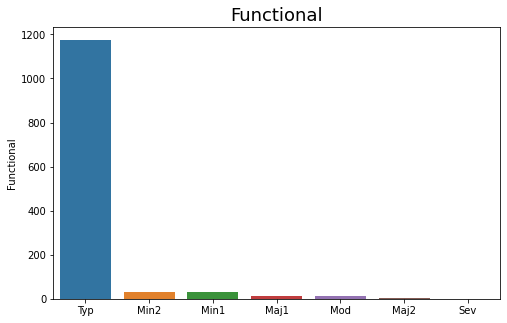

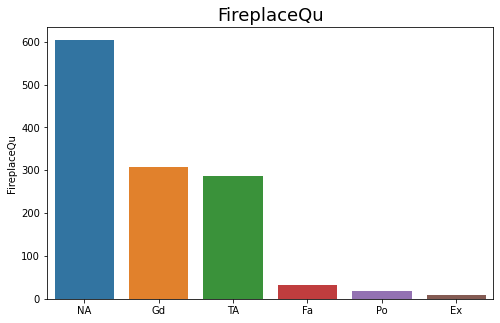

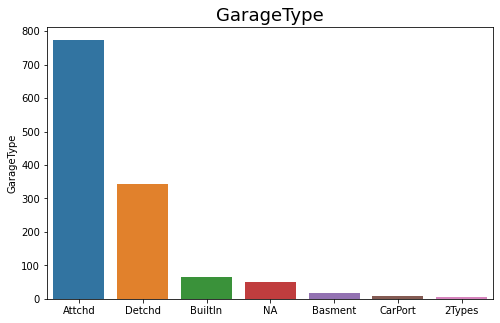

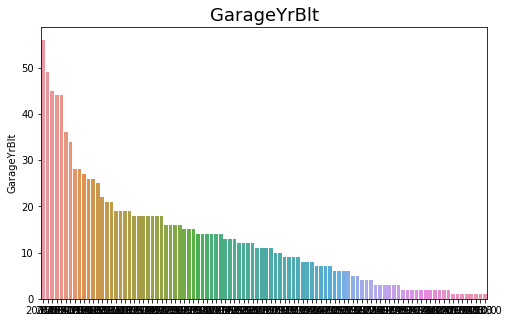

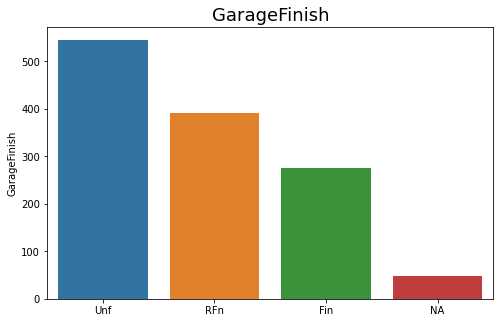

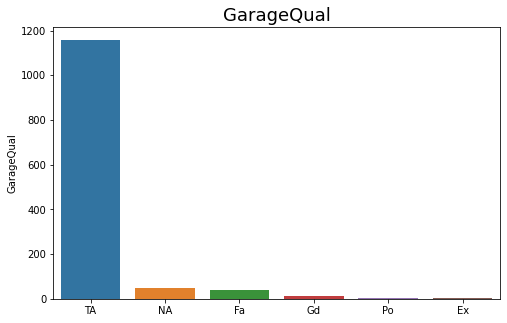

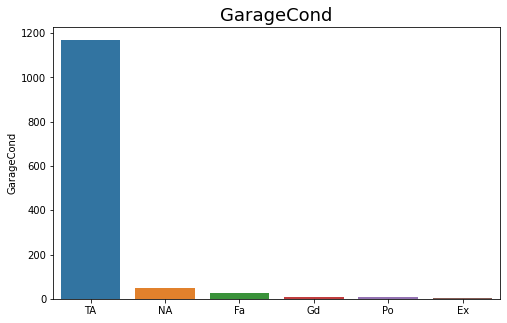

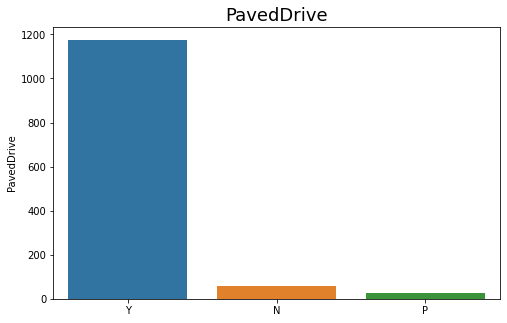

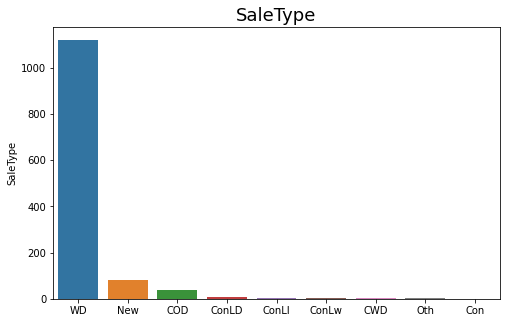

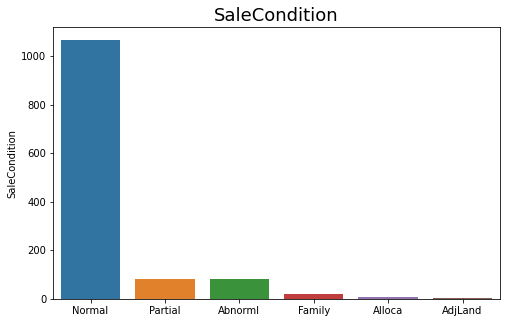

In [710]:
for col in df.select_dtypes(include='object'):
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df[col].value_counts().index, df[col].value_counts())
    plt.show()

## Model Building

### Convert categorical columns to dummies

In [711]:
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()

In [712]:
dummies_df = pd.get_dummies(df[categorical_columns],drop_first=True)

In [713]:
df = pd.concat([df, dummies_df], axis=1)
df.drop(categorical_columns,axis=1,inplace=True)


### Train and Test Set

In [714]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Scale the data

In [715]:
# Instantiate
scaler = StandardScaler()
# fit_transform
X_train_scaled = scaler.fit_transform(X_train)
# transform
X_test_scaled = scaler.transform(X_test)

In [716]:
def plot_coef(model, model_name, top_n):
    'plotting the top and bottom best 10 co-efficients for the model'+ model_name     
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

## Ridge regression

In [717]:
lambdas = [0, 0.001, 0.01]

In [718]:
for i in lambdas: # for each lambda we get different model coefficients   
    # Creating degree 5 features
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_train_scaled, y_train) # fit the model on the polynomial features
   
    #Computing the r2 score
    y_pred = ridgereg.predict(X_test_scaled)
    print("r2 score = " + str(r2_score(y_test, y_pred))) 
    #print(ridgereg.coef_) # model coefficients

r2 score = -2.3888140742693347e+26
r2 score = 0.7156366922694126
r2 score = 0.7164862111020598


## Lasso regression

In [719]:
for i in lambdas:
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train_scaled, y_train)
    
    y_pred = lassoreg.predict(X_test_scaled)
    print("r2 score = " + str(r2_score(y_test, y_pred))) 

r2 score = 0.7246388468354379
r2 score = 0.8792267747216209
r2 score = 0.8789261578085461


In [720]:
print(lassoreg.coef_)

[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  2.11454293e-02
  6.66991980e-02  3.72526953e-03  2.82191030e-02  1.82983054e-02
  0.00000000e+00  2.10776940e-02  0.00000000e+00 -0.00000000e+00
  2.60757793e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.01905133e-02  3.11248666e-04 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.62104703e-03  1.21559865e-02  1.25750097e-02  6.50349590e-03
  5.42788805e-03 -0.00000000e+00  0.00000000e+00  3.40833651e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.17383978e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -3.53397617e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  5.01154444e-03  0.00000000e+00  1.18195592e-02
 -4.57488923e-03  0.00000

## Plotting Coefficients

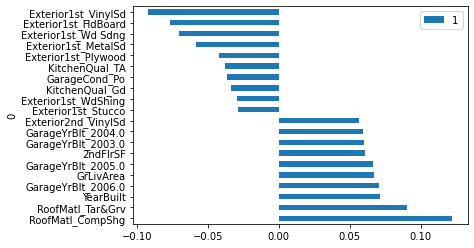

In [721]:
plot_coef(ridgereg,'Ridge',10)

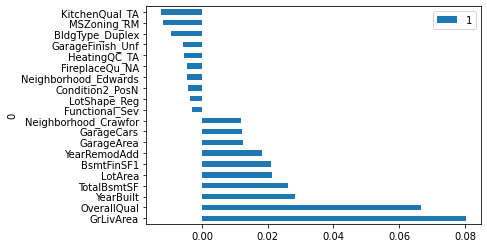

In [722]:
plot_coef(lassoreg,'Lasso',10)

## Final best 5 varibales



The main co-efficants which have a positive impact are "GrLivArea",
"OverallQual',
'YearBuilt',
'TotalBsmtSF'


